# Import Library

In [6]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt
%matplotlib inline 

import warnings
warnings.filterwarnings("ignore")

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,f1_score,precision_score,recall_score,accuracy_score,confusion_matrix
from sklearn.model_selection import GridSearchCV, StratifiedKFold, StratifiedShuffleSplit
from sklearn.model_selection import RepeatedStratifiedKFold

## Read dataset

In [8]:
loan = pd.read_csv("Loan_data.csv")
loan = loan.drop("Loan_ID",axis=1)

In [9]:
loan.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


## AutoViz 

* AutoViz performs automatic visualization of any dataset.

Shape of your Data Set loaded: (614, 13)
#######################################################################################
######################## C L A S S I F Y I N G  V A R I A B L E S  ####################
#######################################################################################
Classifying variables in data set...
Data cleaning improvement suggestions. Complete them before proceeding to ML modeling.


,Nullpercent,NuniquePercent,dtype,Nuniques,Nulls,Least num. of categories,Data cleaning improvement suggestions
Credit_History,8.143322,0.325733,float64,2,50,0,"fill missing values, left skewed distribution: cap or drop outliers"
Self_Employed,5.211726,0.325733,object,2,32,82,"fill missing values, fix mixed data types"
LoanAmount,3.583062,33.061889,float64,203,22,0,"fill missing values, right skewed distribution: cap or drop outliers"
Dependents,2.442997,0.651466,object,4,15,51,"fill missing values, fix mixed data types"
Loan_Amount_Term,2.280130,1.628664,float64,10,14,0,"fill missing values, left skewed distribution: cap or drop outliers"
Gender,2.117264,0.325733,object,2,13,112,"fill missing values, fix mixed data types"
Married,0.488599,0.325733,object,2,3,213,"fill missing values, fix mixed data types"
Loan_ID,0.000000,100.000000,object,614,0,1,"combine rare categories, possible ID column: drop"
Education,0.000000,0.325733,object,2,0,134,
ApplicantIncome,0.000000,82.247557,int64,505,0,0,


    12 Predictors classified...
        1 variables removed since they were ID or low-information variables
        List of variables removed: ['Loan_ID']

################ Binary_Classification problem #####################


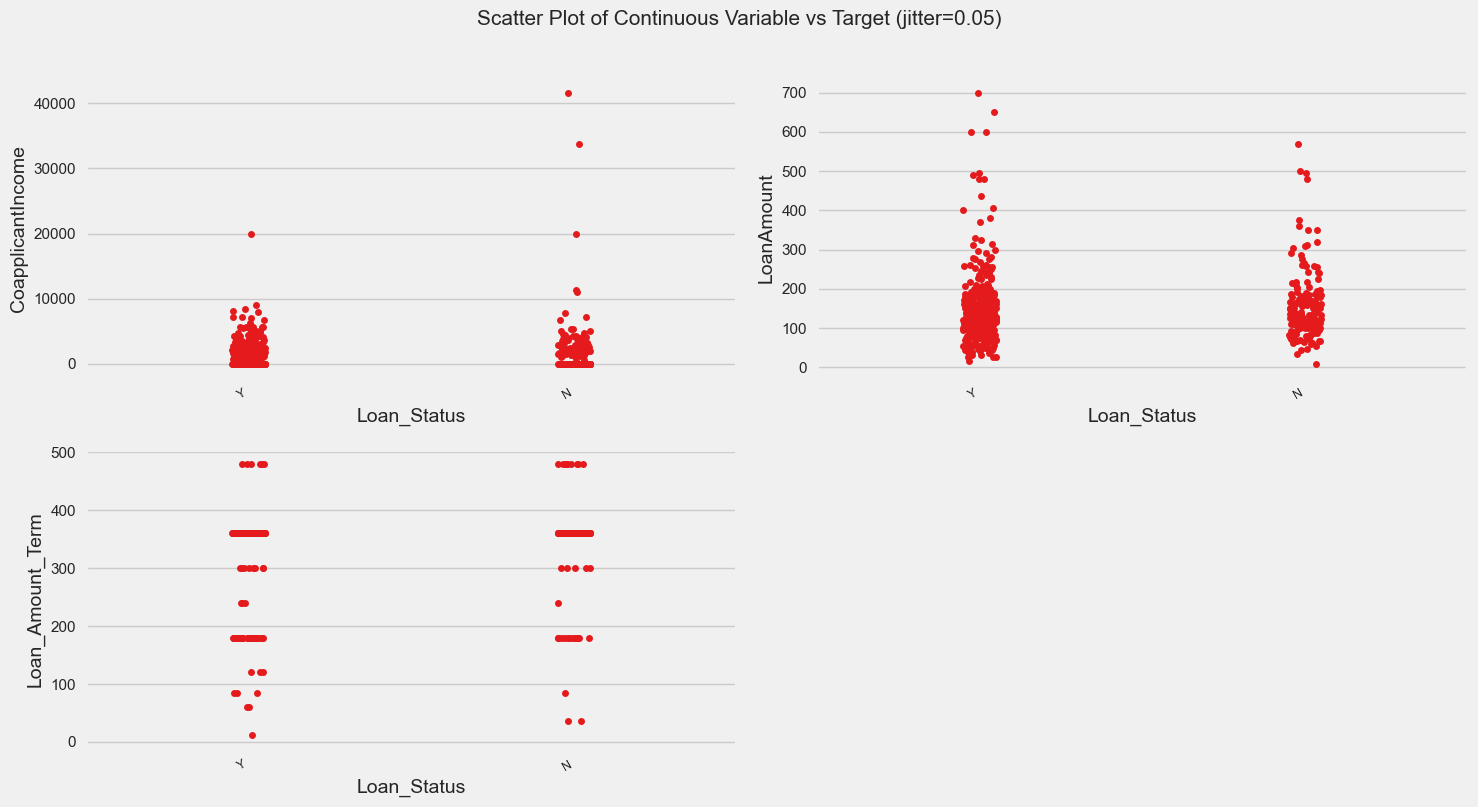

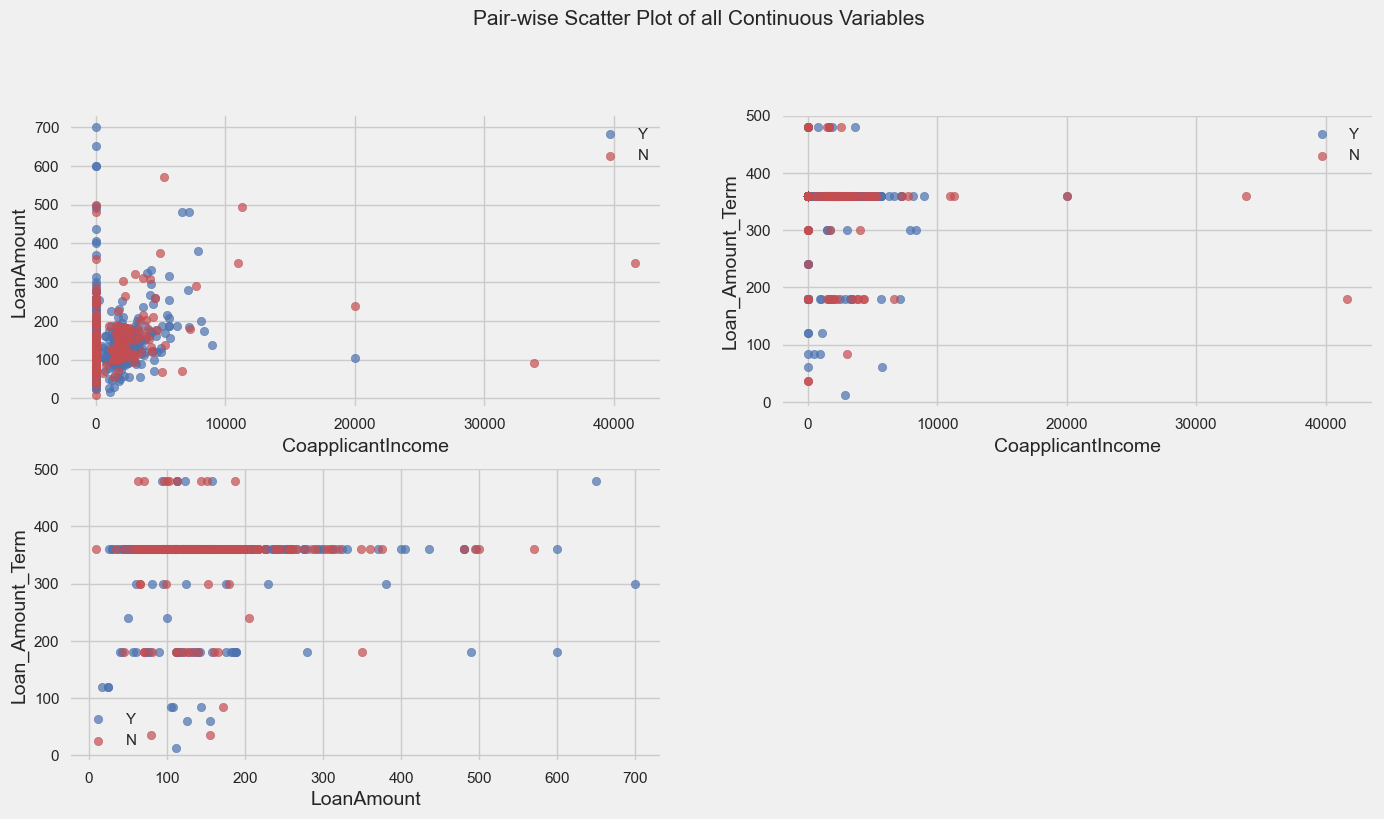

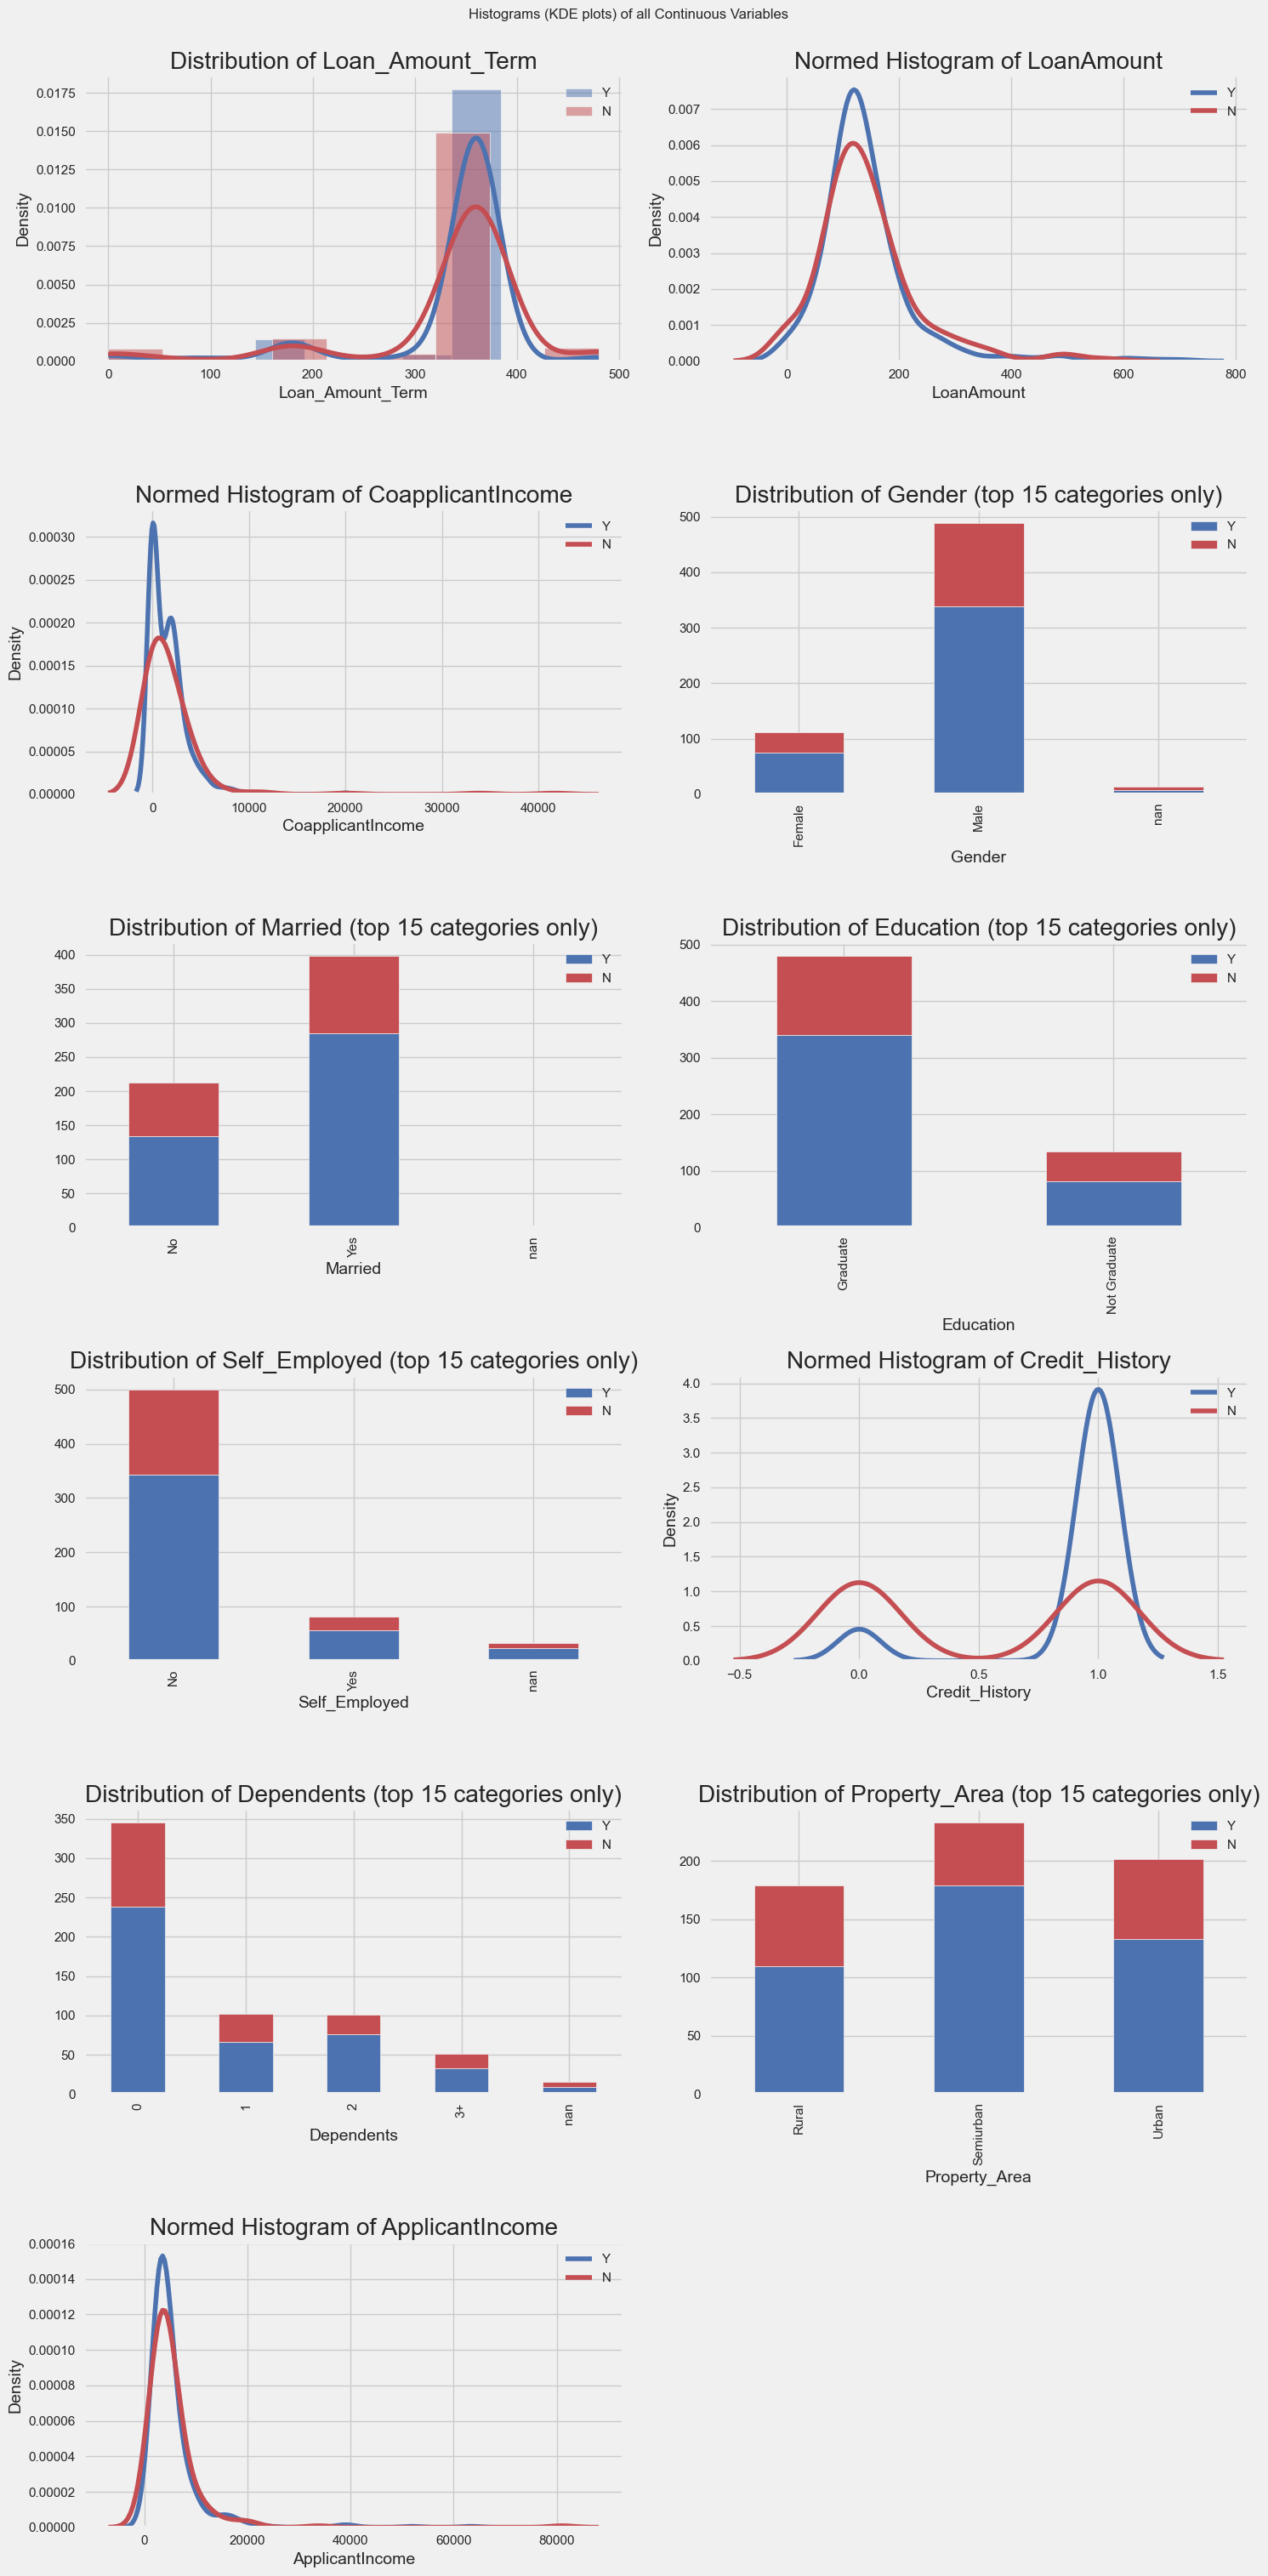

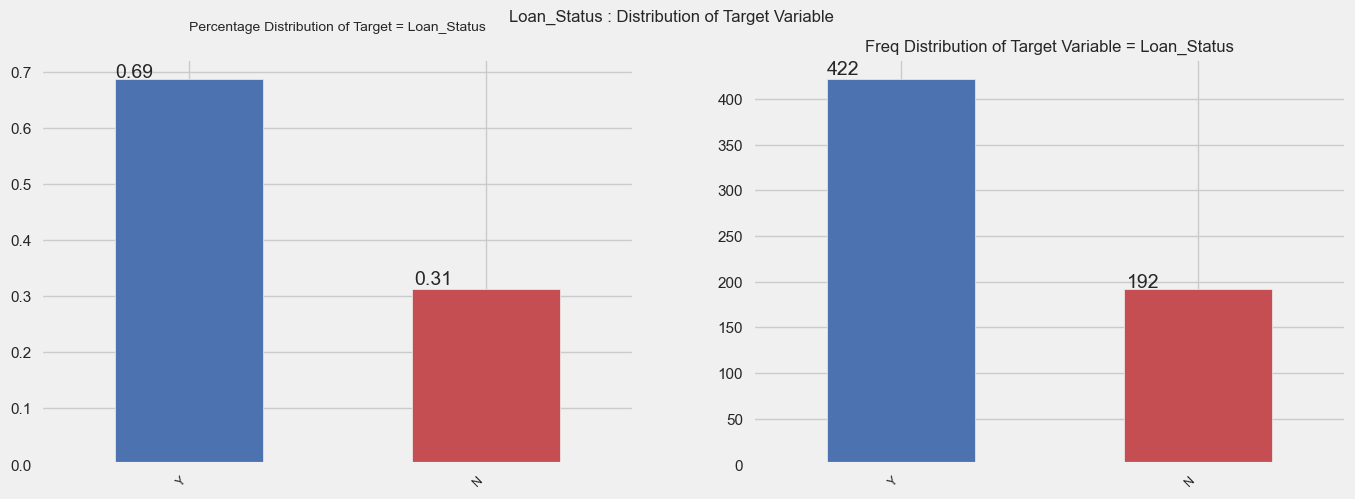

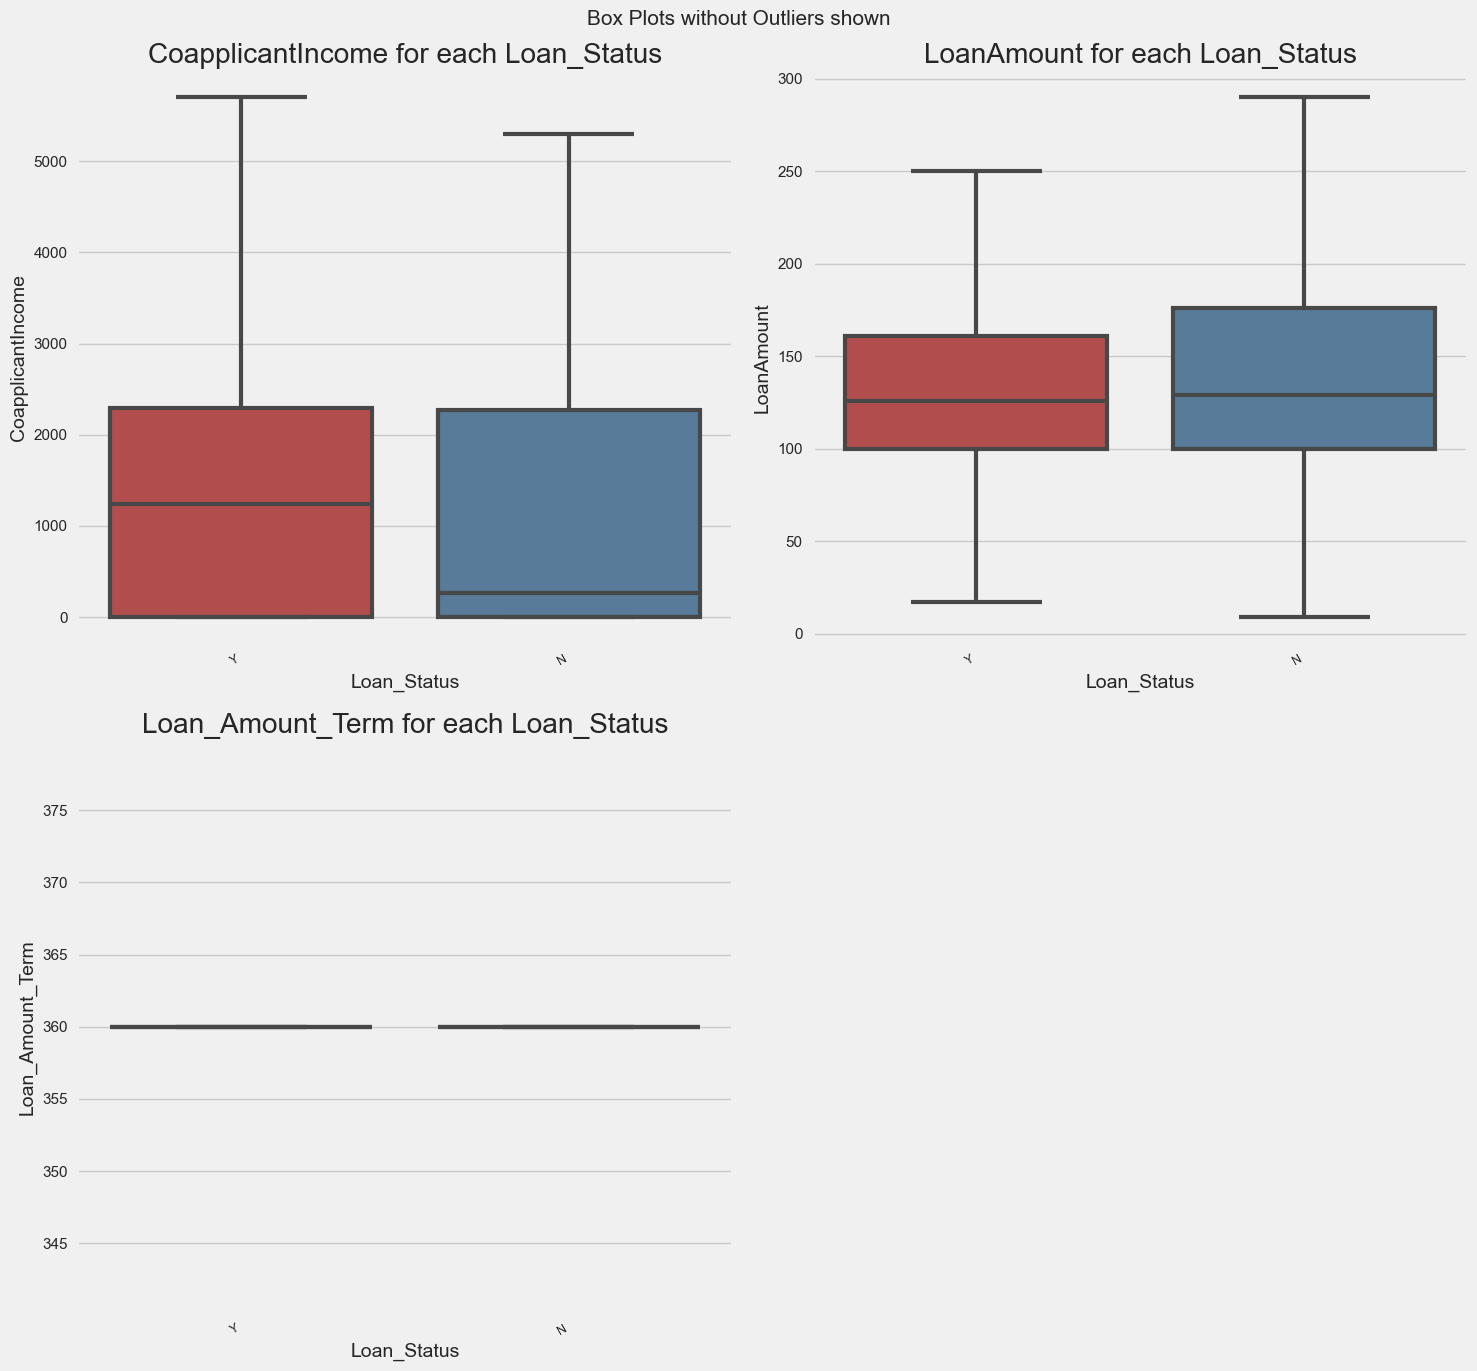

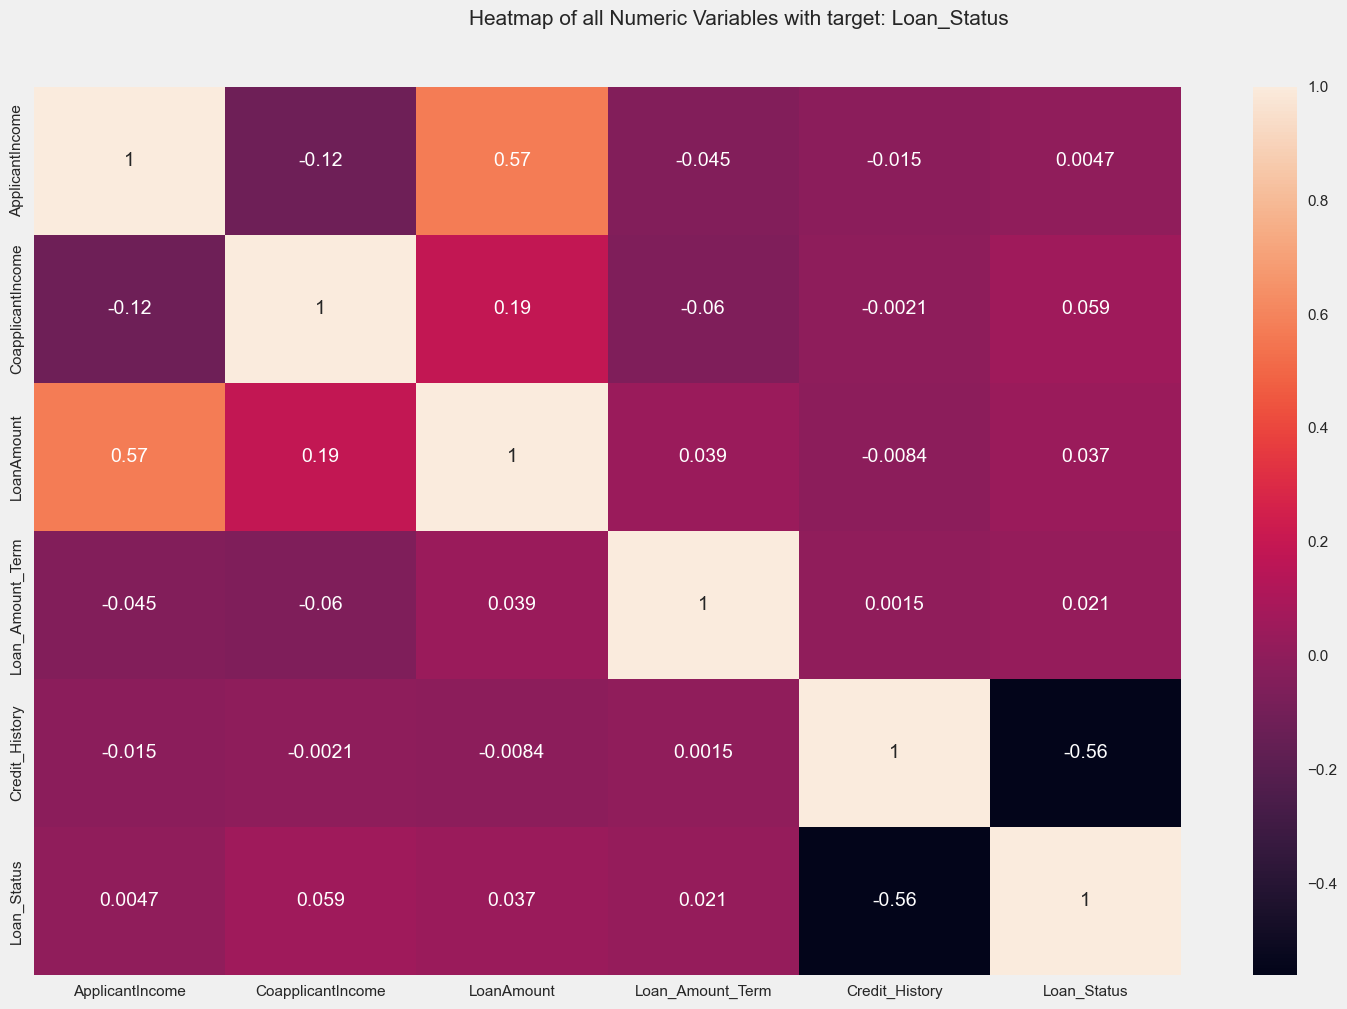

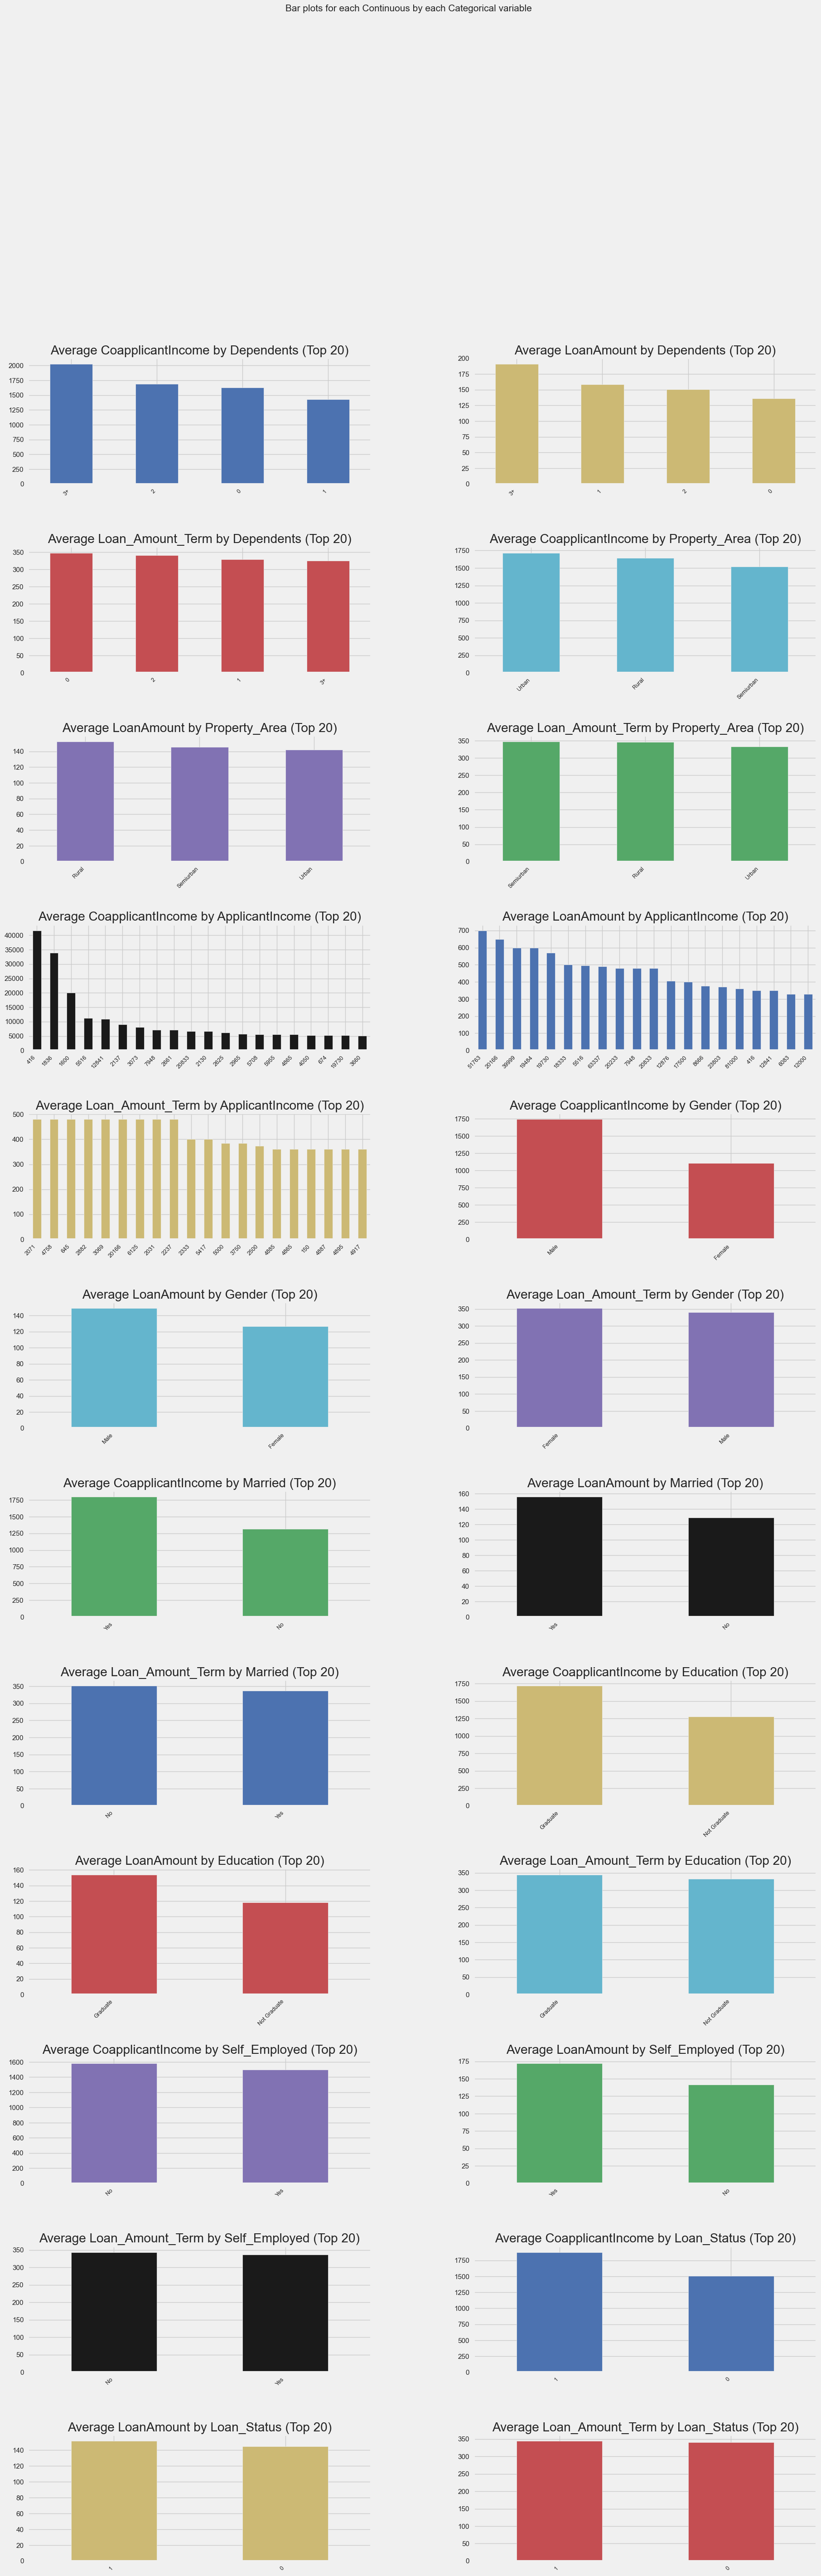

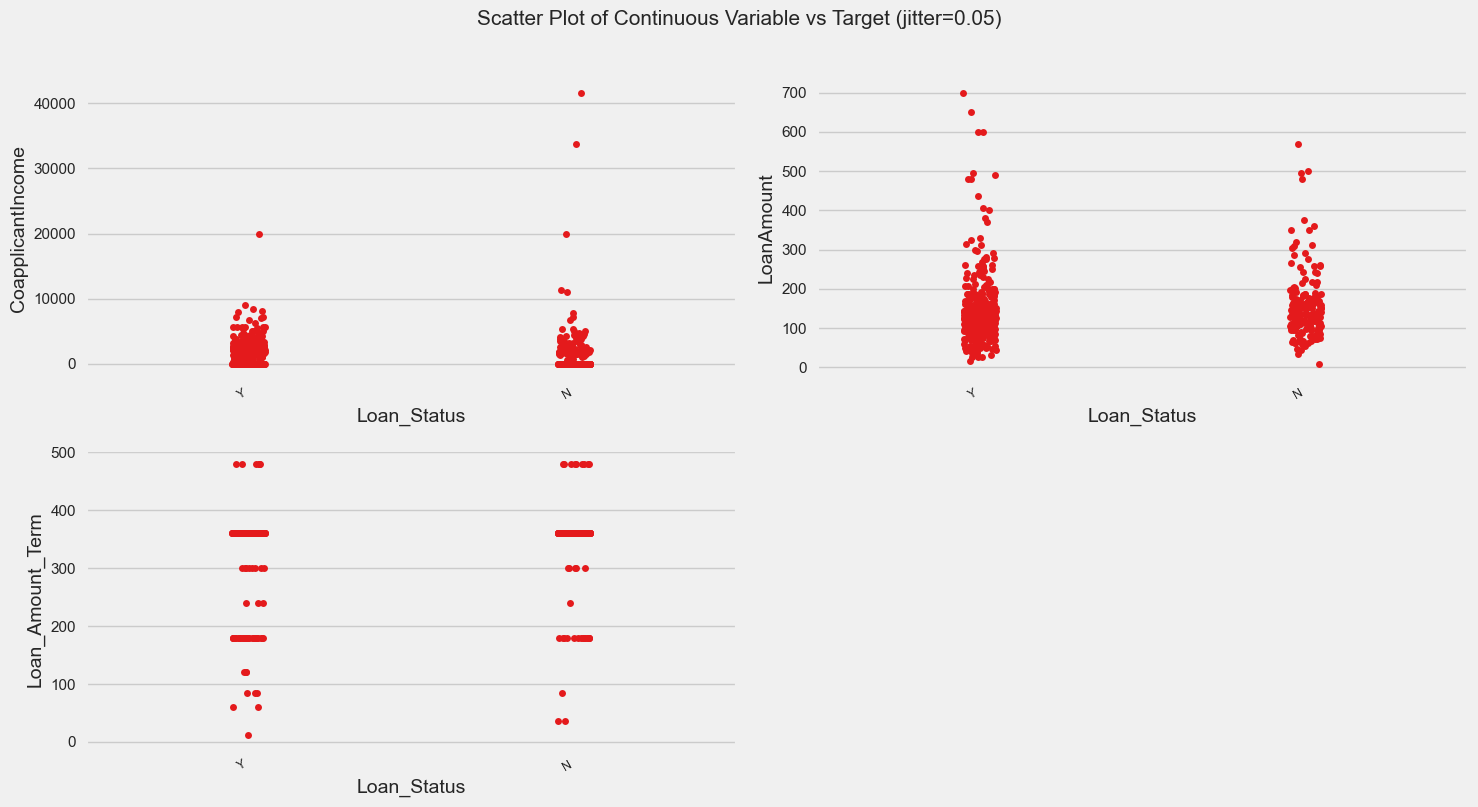

Total Number of Scatter Plots = 6


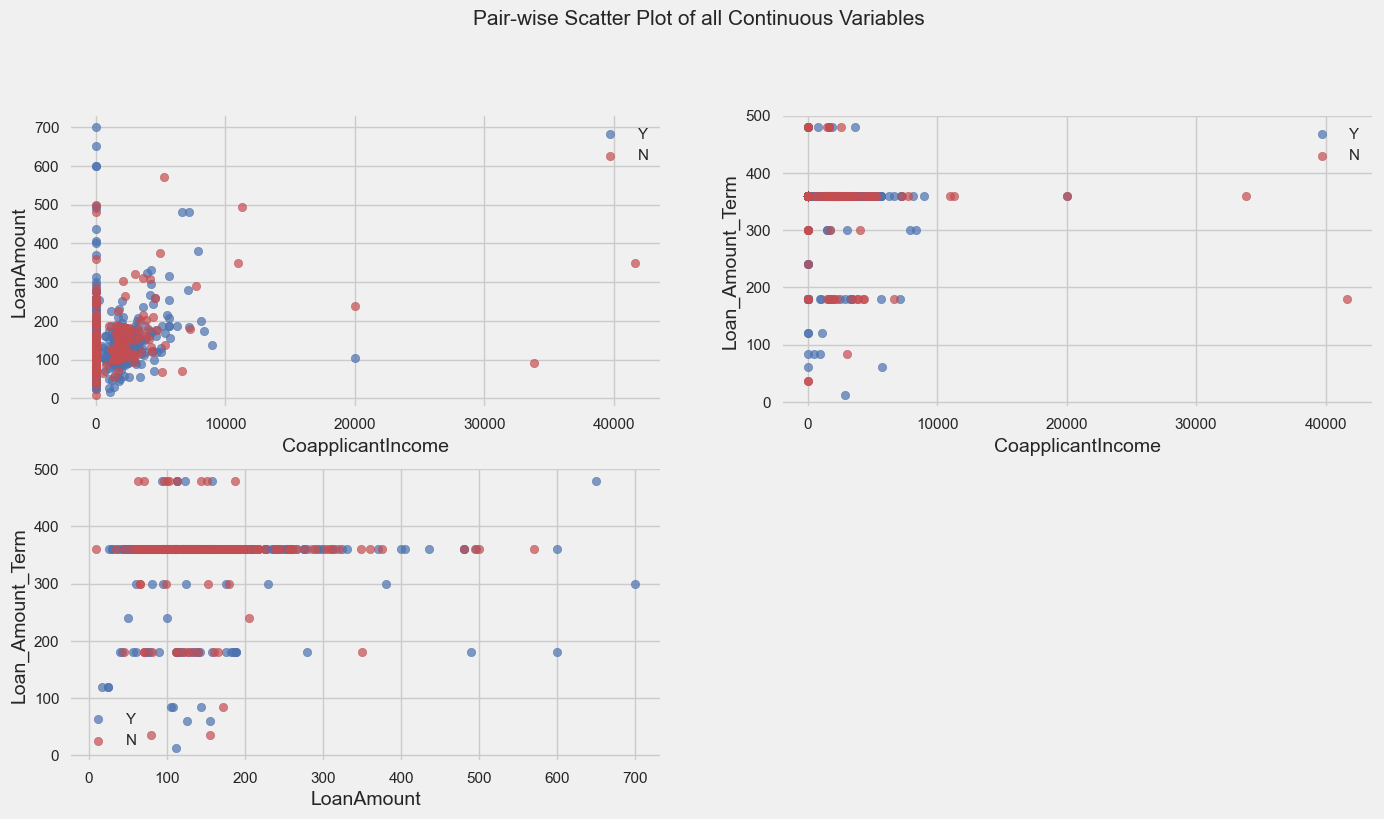

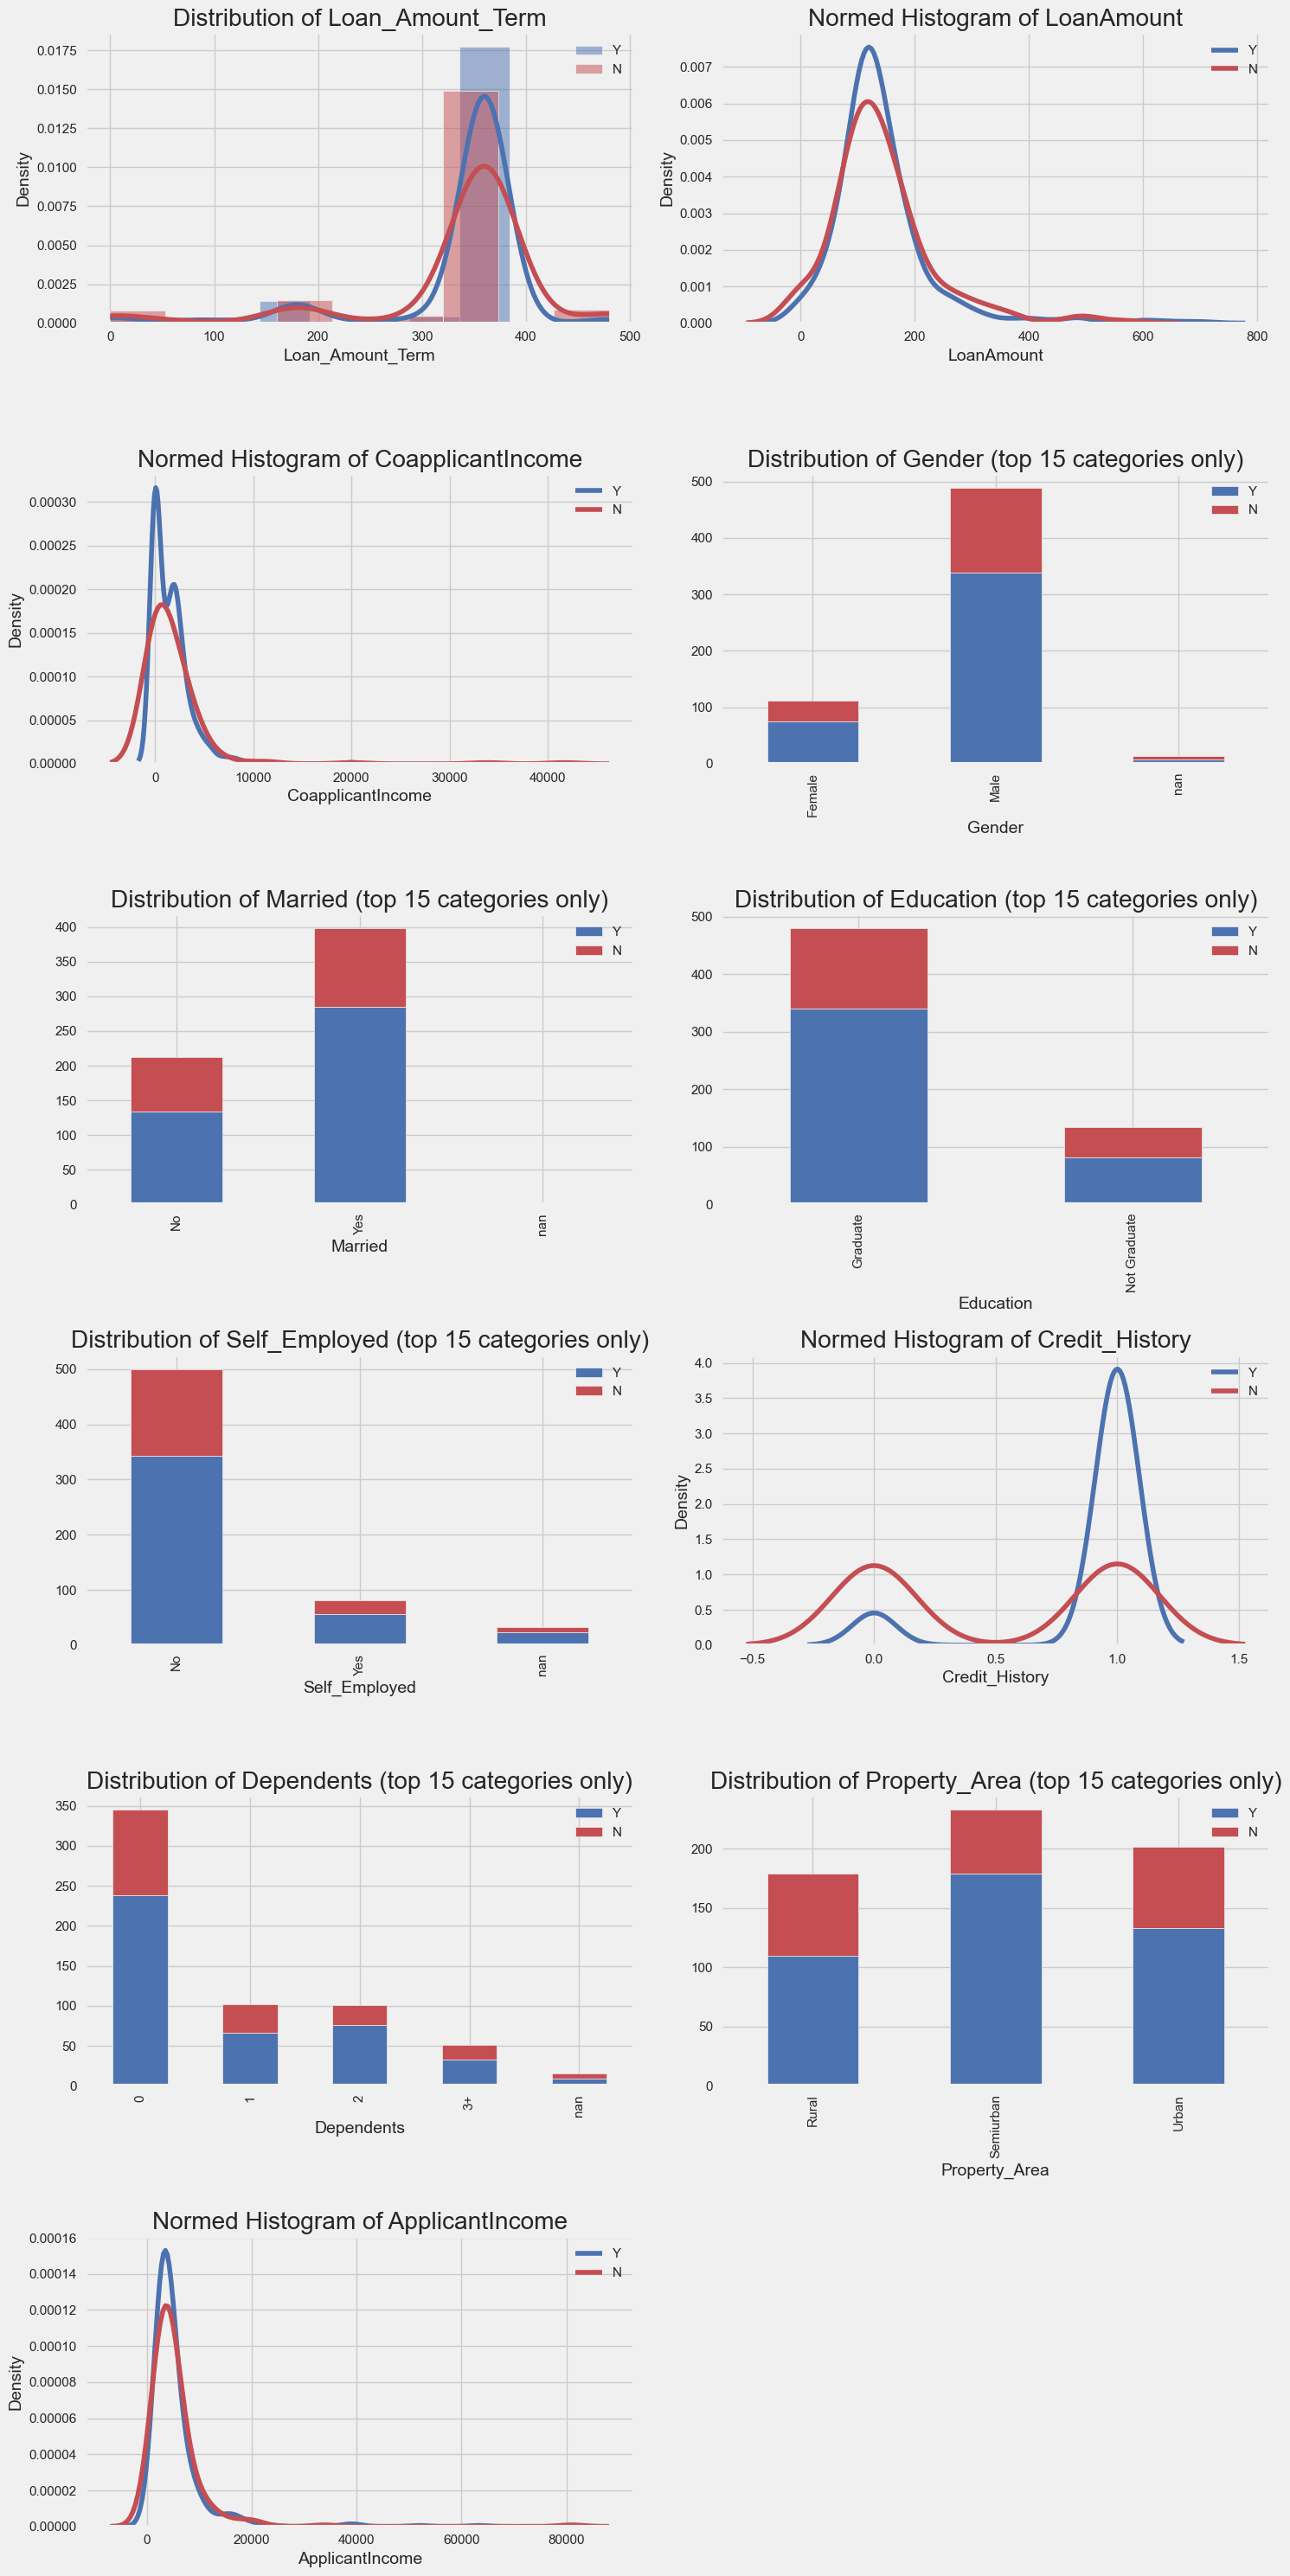

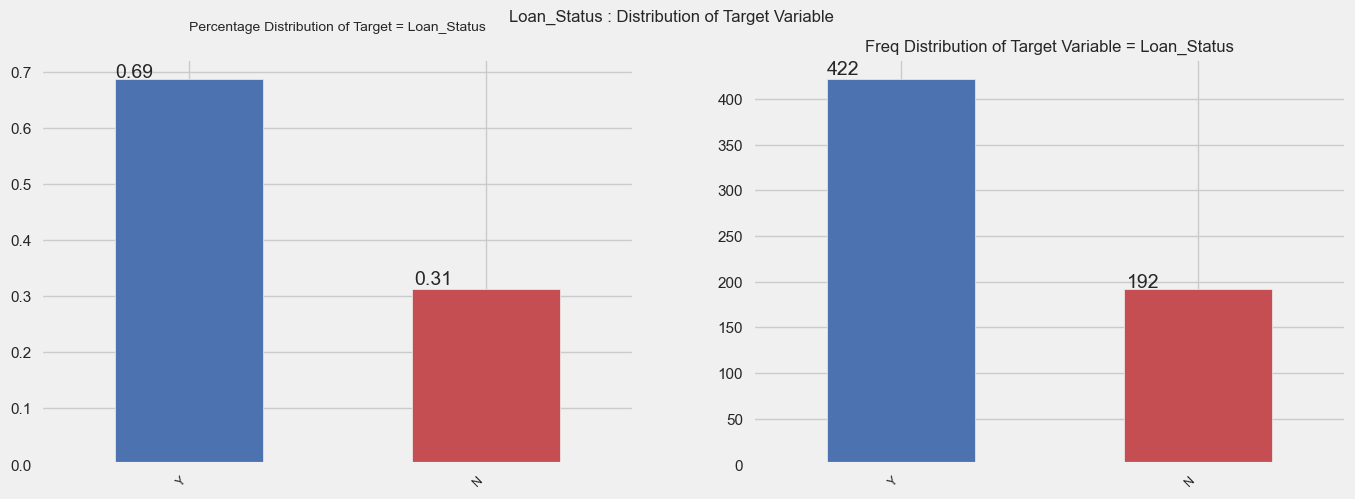

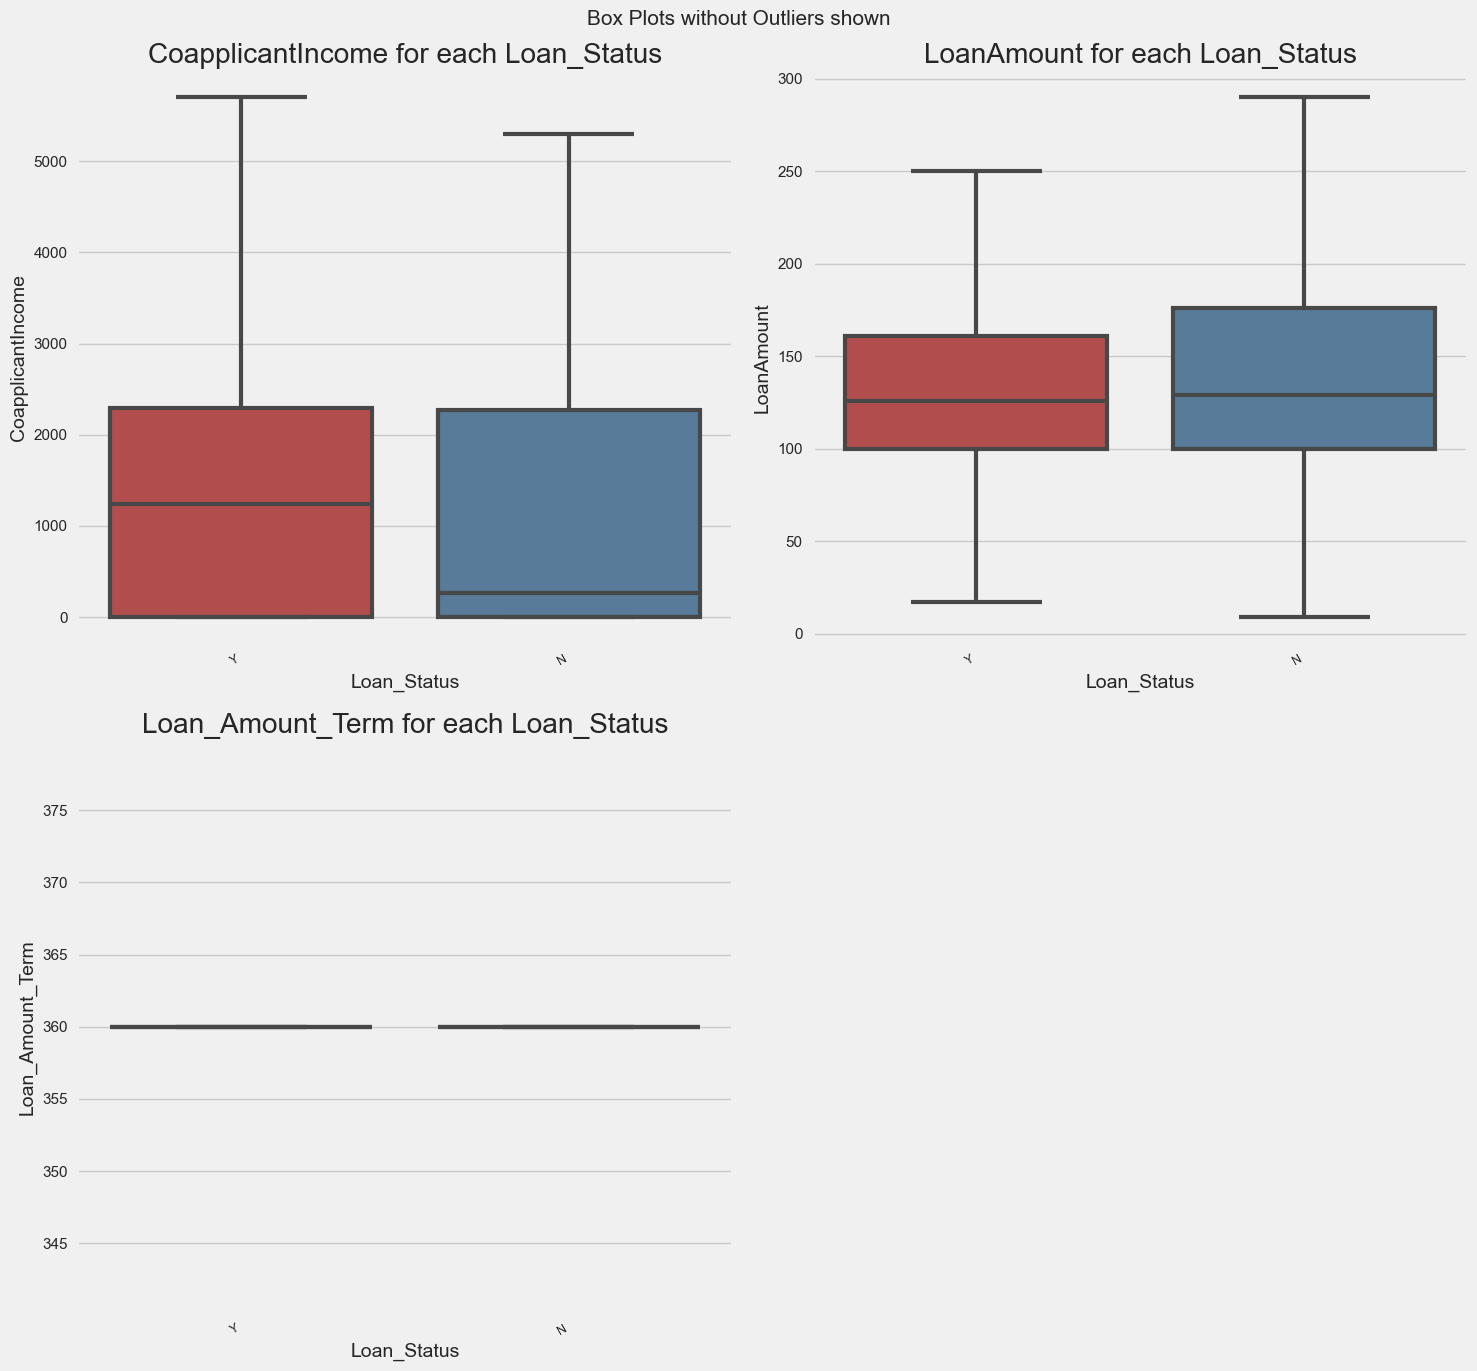

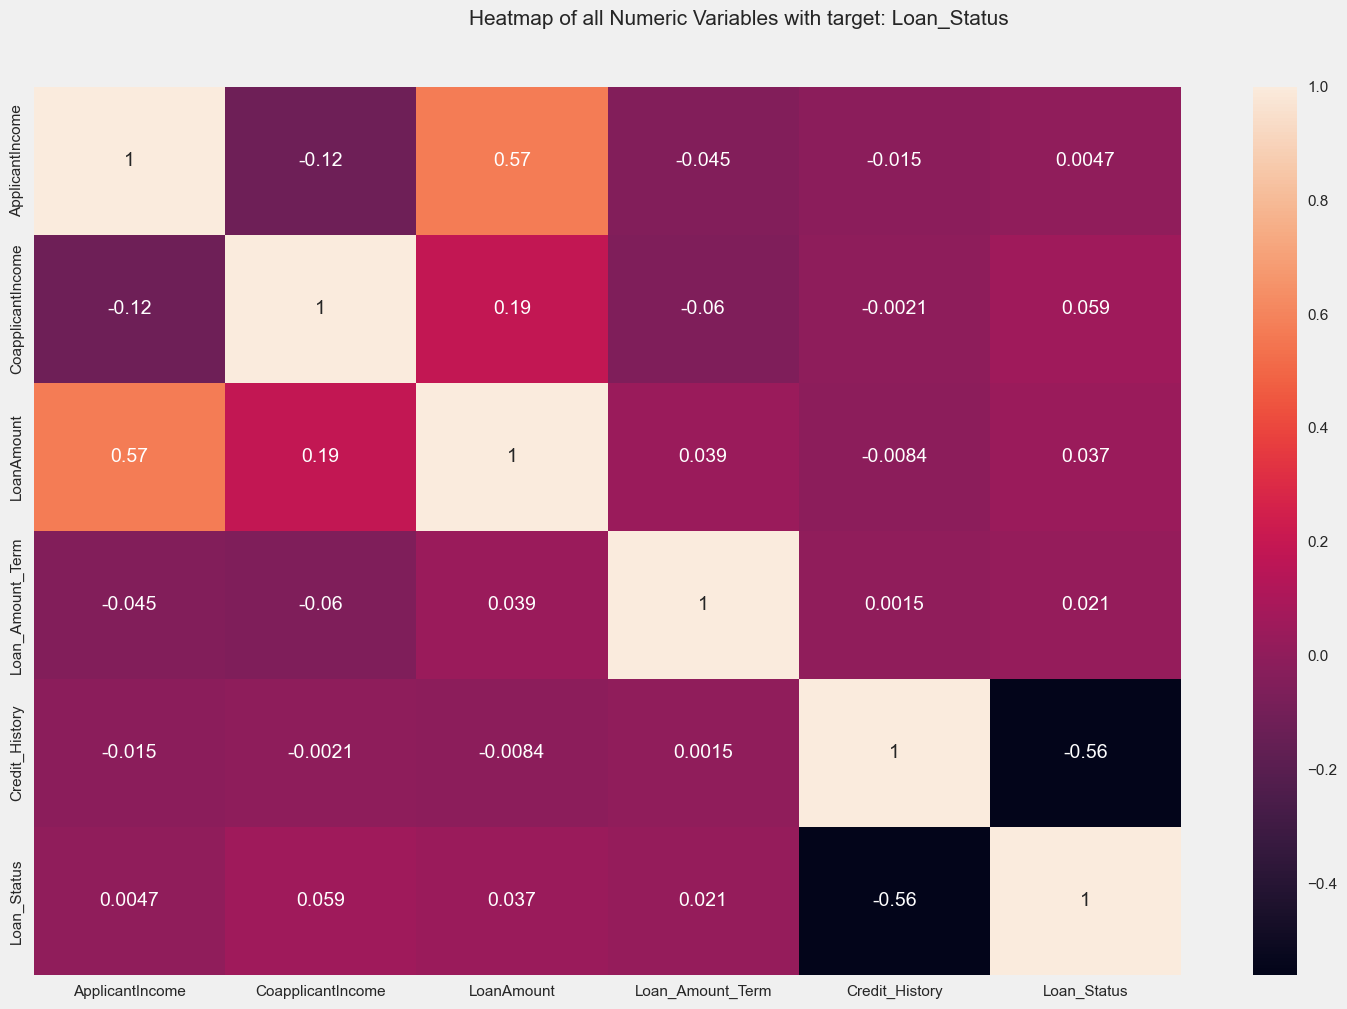

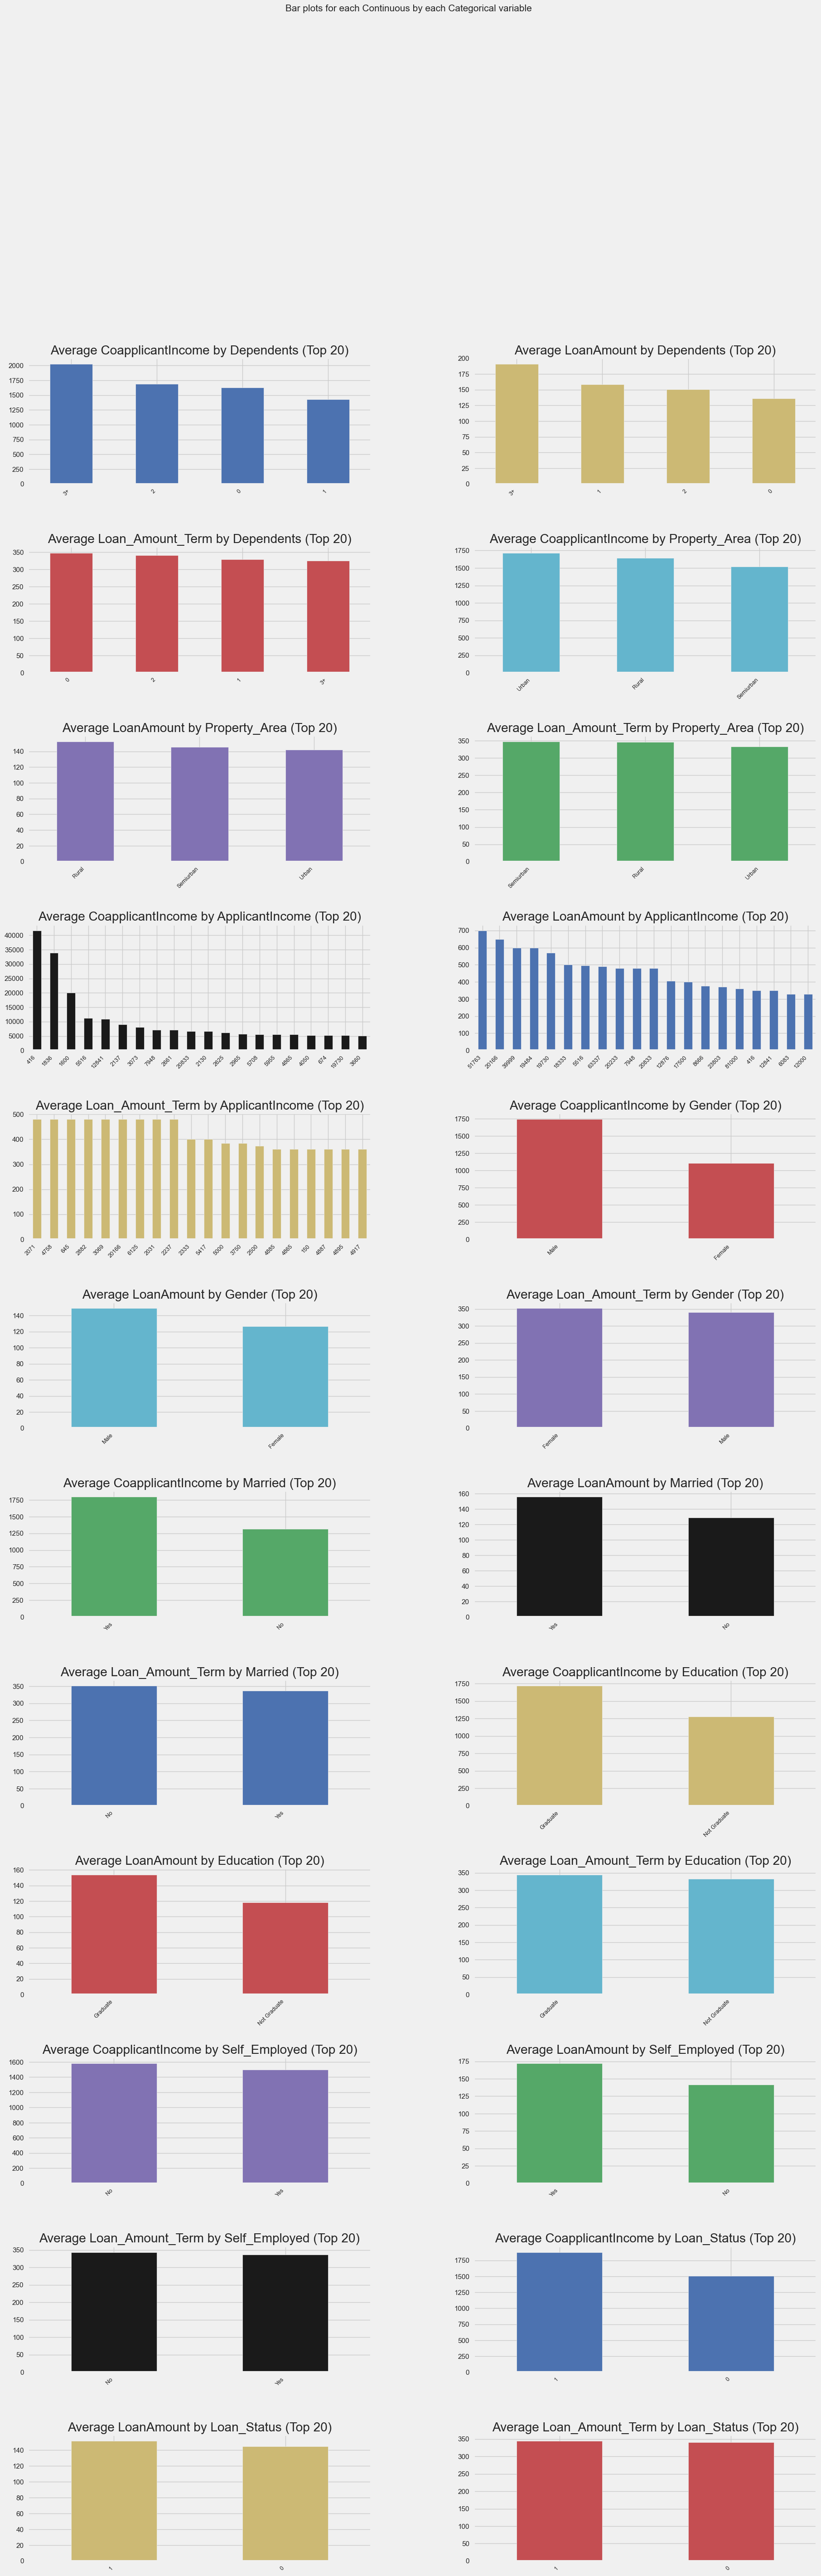

All Plots done
Time to run AutoViz = 33 seconds 

 ###################### AUTO VISUALIZATION Completed ########################


In [10]:
from autoviz.AutoViz_Class import AutoViz_Class
AV= AutoViz_Class()
data = AV.AutoViz('Loan_data.csv',depVar='Loan_Status')

## SweetViz

* Sweetviz is library that generates beautiful, high-density visualizing target values and comparing datasets.

In [12]:
import sweetviz as sv
report = sv.analyze([loan, "Data"],target_feat='Loan_Status')
report.show_html('Report.html')

                                             |                                             | [  0%]   00:00 ->…

Report Report.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


## Fill null values

In [13]:
loan = loan.fillna(loan.mode().iloc[0])

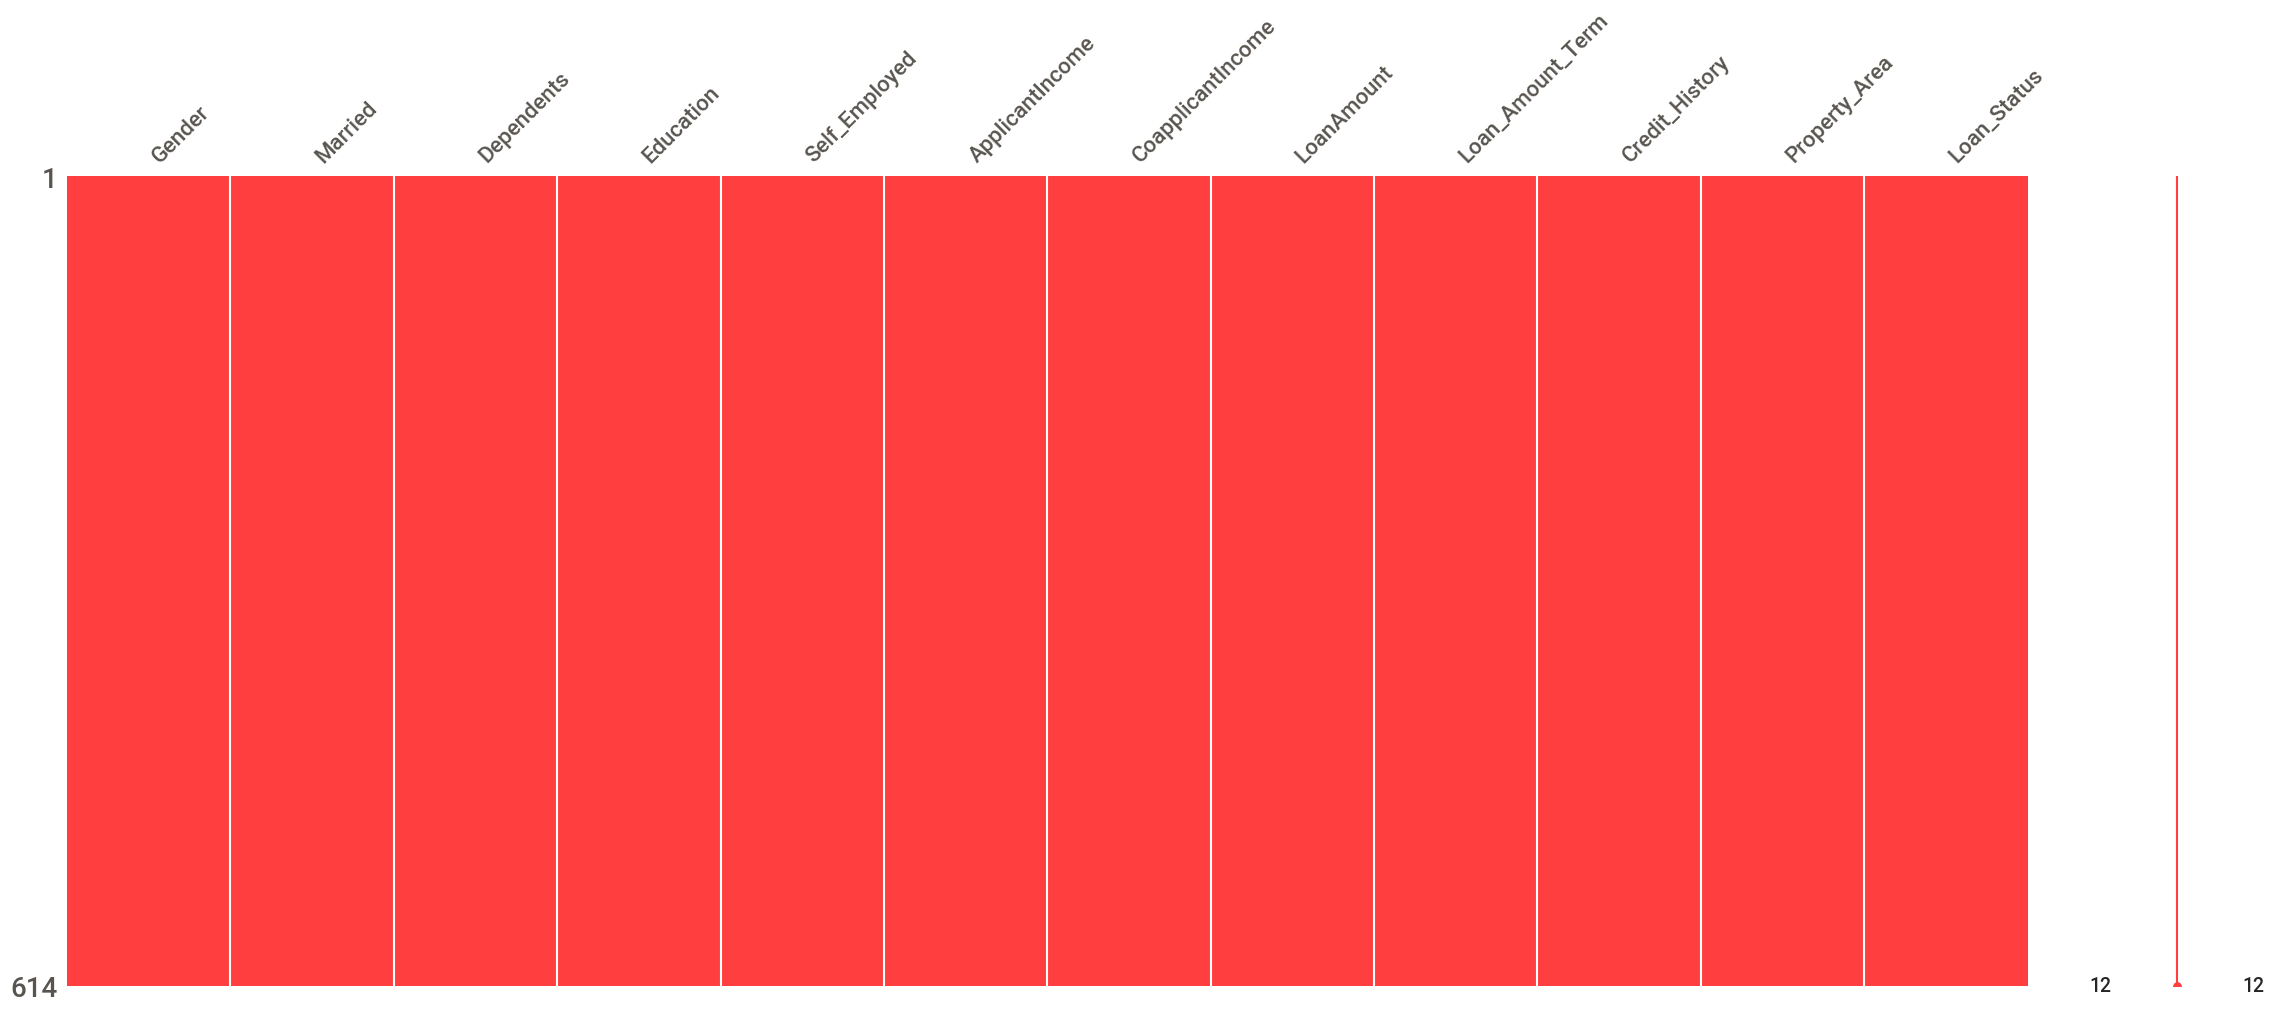

In [14]:
import missingno as msno
msno.matrix(loan,color=(1, 0.25, 0.25));

## Outliers detection and removal

In [15]:
from feature_engine import transformation as vt
tf = vt.YeoJohnsonTransformer(variables = ['CoapplicantIncome','LoanAmount','Loan_Amount_Term','Credit_History'])

loan= tf.fit_transform(loan)

In [16]:
from autoviz import data_cleaning_suggestions
data_cleaning_suggestions(loan)

Data cleaning improvement suggestions. Complete them before proceeding to ML modeling.


,Nullpercent,NuniquePercent,dtype,Nuniques,Nulls,Least num. of categories,Data cleaning improvement suggestions
Gender,0.000000,0.325733,object,2,0,112,
Married,0.000000,0.325733,object,2,0,213,
Dependents,0.000000,0.651466,object,4,0,51,
Education,0.000000,0.325733,object,2,0,134,
Self_Employed,0.000000,0.325733,object,2,0,82,
ApplicantIncome,0.000000,82.247557,int64,505,0,0,
CoapplicantIncome,0.000000,46.742671,float64,287,0,0,
LoanAmount,0.000000,33.061889,float64,203,0,0,
Loan_Amount_Term,0.000000,1.628664,float64,10,0,0,
Credit_History,0.000000,0.325733,float64,2,0,0,left skewed distribution: cap or drop outliers


In [17]:
loan.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,614.000000,6.140000e+02,614.000000
mean,5403.459283,5.444114,5.468579,1.705816e+07,81.489205
std,6109.041673,4.940488,0.615929,6.407712e+06,33.579126
min,150.000000,0.000000,2.431157,7.768550e+02,0.000000
25%,2877.500000,0.000000,5.154180,1.818205e+07,95.303566
50%,3812.500000,8.785565,5.426996,1.818205e+07,95.303566
75%,5795.000000,9.804698,5.773009,1.818205e+07,95.303566
max,81000.000000,14.787841,7.667611,4.333854e+07,95.303566


## Encode categorical values

In [18]:
import category_encoders as ce 
encoder = ce.OrdinalEncoder(['Gender','Married','Dependents','Education','Self_Employed','Property_Area'])
loan = encoder.fit_transform(loan)

In [19]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
loan['Loan_Status'] = encoder.fit_transform(loan['Loan_Status'])

In [20]:
loan.head(3)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,1,1,1,1,5849,0.000000,5.376274,1.818205e+07,95.303566,1,0
1,1,2,2,1,1,4583,9.149313,5.456515,1.818205e+07,95.303566,2,1
2,1,2,1,1,2,3000,0.000000,4.646663,1.818205e+07,95.303566,1,0


## Split data

In [21]:
X = loan.drop('Loan_Status',axis=1)
y = loan['Loan_Status']

In [22]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=.20,random_state=42)

In [23]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

## LogisticRegression

In [24]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

# Logistic Regression
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(random_state=42)  
logreg.fit(X_train, y_train)
y_pred_lr = logreg.predict(X_test)

log_train = round(logreg.score(X_train, y_train) * 100, 2)
log_accuracy = round(accuracy_score(y_pred_lr, y_test) * 100, 2)

print("Training Accuracy    :",log_train ,"%")
print("Model Accuracy Score :",log_accuracy ,"%")
print("\033[1m--------------------------------------------------------\033[0m")
print("Confusion_matrix :")
print(confusion_matrix(y_test,y_pred_lr))

Training Accuracy    : 81.26 %
Model Accuracy Score : 78.86 %
--------------------------------------------------------
Confusion_matrix :
[[79  1]
 [25 18]]


## LogisticRegression GridSearchCV

In [25]:
C_vals = [1,2,3,4,5,6,7,8,9,10,12,13,14,15,16,16.5,17]
penalties = ['l2']

param = {'penalty': penalties, 'C': C_vals}

logreg = LogisticRegression(random_state=42)
## Calling on GridSearchCV object. 
grid_log = GridSearchCV(estimator=LogisticRegression(), 
                           param_grid = param,
                           scoring = 'accuracy',
                           cv = 5
                          )
## Fitting the model
grid_log.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 12, 13, 14, 15,
                               16, 16.5, 17],
                         'penalty': ['l2']},
             scoring='accuracy')

In [26]:
print (grid_log.best_score_)
print (grid_log.best_params_)
print(grid_log.best_estimator_)

0.8125541125541126
{'C': 1, 'penalty': 'l2'}
LogisticRegression(C=1)


In [27]:
### Using the best parameters from the grid-search.
logreg_grid = grid_log.best_estimator_

log_train_grid = round(logreg_grid.score(X_train, y_train) * 100, 2)
log_accuracy_grid = logreg_grid.score(X_train,y_train).round(2)*100

print("Training Accuracy with GridSearch :",log_train_grid  ,"%")
print("Model Accuracy with GridSearch    :",log_accuracy_grid ,"%")


Training Accuracy with GridSearch : 81.26 %
Model Accuracy with GridSearch    : 81.0 %


## Decision Tree Classifier

In [28]:
# Decision Tree
from sklearn.tree import DecisionTreeClassifier
decision = DecisionTreeClassifier(random_state=42)
decision.fit(X_train, y_train)
y_pred_dec = decision.predict(X_test)

decision_train = round(decision.score(X_train, y_train) * 100, 2)
decision_accuracy = round(accuracy_score(y_pred_dec, y_test) * 100, 2)

print("Training Accuracy    :",decision_train ,"%")
print("Model Accuracy Score :",decision_accuracy ,"%")
print("\033[1m--------------------------------------------------------\033[0m")
print("Confusion_matrix :")
print(confusion_matrix(y_test,y_pred_dec))

Training Accuracy    : 100.0 %
Model Accuracy Score : 70.73 %
--------------------------------------------------------
Confusion_matrix :
[[66 14]
 [22 21]]


## DecisionTreeClassifier GridSearchCV 

In [29]:
# Create the parameter grid based on the results of random search 
params = {
    'max_depth': [5, 10, 20,25],
    'min_samples_leaf': [10, 20, 50, 100,120],
    'criterion': ["gini", "entropy"]
}

cv = StratifiedShuffleSplit(n_splits = 10, test_size = .25,random_state=42)

grid_dec = GridSearchCV(estimator=DecisionTreeClassifier(random_state=42), 
                           param_grid=params, 
                           cv=cv, n_jobs=-1, verbose=1, scoring = "accuracy")

grid_dec.fit(X_train,y_train)

Fitting 10 folds for each of 40 candidates, totalling 400 fits


GridSearchCV(cv=StratifiedShuffleSplit(n_splits=10, random_state=42, test_size=0.25,
            train_size=None),
             estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [5, 10, 20, 25],
                         'min_samples_leaf': [10, 20, 50, 100, 120]},
             scoring='accuracy', verbose=1)

In [30]:
print (grid_dec.best_score_)
print (grid_dec.best_params_)
print(grid_dec.best_estimator_)

0.8162601626016259
{'criterion': 'entropy', 'max_depth': 5, 'min_samples_leaf': 20}
DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_leaf=20,
                       random_state=42)


In [31]:
### Using the best parameters from the grid-search.
dec_grid = grid_dec.best_estimator_

decision_train_grid = round(dec_grid.score(X_train, y_train) * 100, 2)
decision_accuracy_grid = dec_grid.score(X_train,y_train).round(2)*100

print("Training Accuracy with GridSearch :",decision_train_grid  ,"%")
print("Model Accuracy with GridSearch    :",decision_accuracy_grid ,"%")

Training Accuracy with GridSearch : 81.67 %
Model Accuracy with GridSearch    : 82.0 %


## KNN 

In [32]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)

knn_train = round(knn.score(X_train, y_train) * 100, 2)
knn_accuracy = round(accuracy_score(y_pred_knn, y_test) * 100, 2)

print("Training Accuracy    :",knn_train ,"%")
print("Model Accuracy Score :",knn_accuracy ,"%")
print("\033[1m--------------------------------------------------------\033[0m")
print("Confusion_matrix :")
print(confusion_matrix(y_test,y_pred_knn))

Training Accuracy    : 82.48 %
Model Accuracy Score : 77.24 %
--------------------------------------------------------
Confusion_matrix :
[[77  3]
 [25 18]]


## KNeighborsClassifier GridSearchCV

In [33]:
from sklearn.model_selection import GridSearchCV

k_range = range(1,31) 
weights_options=['uniform','distance']
param = {'n_neighbors':k_range, 'weights':weights_options}

cv = StratifiedShuffleSplit(n_splits=10, test_size=.30, random_state=42)

grid_knn = GridSearchCV(KNeighborsClassifier(), param,cv=cv,verbose = False, n_jobs=-1)

grid_knn.fit(X_train,y_train)

GridSearchCV(cv=StratifiedShuffleSplit(n_splits=10, random_state=42, test_size=0.3,
            train_size=None),
             estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'n_neighbors': range(1, 31),
                         'weights': ['uniform', 'distance']},
             verbose=False)

In [34]:
print(grid_knn.best_score_)
print(grid_knn.best_params_)
print(grid_knn.best_estimator_)

0.8033783783783784
{'n_neighbors': 9, 'weights': 'uniform'}
KNeighborsClassifier(n_neighbors=9)


In [35]:
### Using the best parameters from the grid-search.
knn_grid = grid_knn.best_estimator_

knn_train_grid = round(knn_grid.score(X_train, y_train) * 100, 2)
knn_accuracy_grid = knn_grid.score(X_train,y_train).round(2)*100

print("Training Accuracy with GridSearch :",knn_train_grid  ,"%")
print("Model Accuracy with GridSearch    :",knn_accuracy_grid ,"%")

Training Accuracy with GridSearch : 81.87 %
Model Accuracy with GridSearch    : 82.0 %


## GradientBoostingClassifier

In [36]:
from sklearn.ensemble import GradientBoostingClassifier
gbc = GradientBoostingClassifier(random_state=42)
gbc.fit(X_train,y_train)
y_pred_gbc = gbc.predict(X_test)


gbc_train = round(gbc.score(X_train, y_train) * 100, 2)
gbc_accuracy = round(accuracy_score(y_pred_gbc, y_test) * 100, 2)

print("Training Accuracy    :",gbc_train ,"%")
print("Model Accuracy Score :",gbc_accuracy ,"%")
print("\033[1m--------------------------------------------------------\033[0m")
print("Confusion_matrix :")
print(confusion_matrix(y_test,y_pred_gbc))

Training Accuracy    : 89.61 %
Model Accuracy Score : 77.24 %
--------------------------------------------------------
Confusion_matrix :
[[77  3]
 [25 18]]


## GradientBoostingClassifier GridSearchCV 

In [37]:
### BEGIN SOLUTION
from sklearn.ensemble import GradientBoostingClassifier
    
# The parameters to be fit
param_grid = {
    'learning_rate': [0.01, 0.025, 0.05, 0.075, 0.1],
    'n_estimators':[140, 150, 160], 
    'max_depth':[3, 4, 5]       
     }

cv = StratifiedShuffleSplit(n_splits=10, test_size=.30, random_state=42)
# The grid search object
grid_gbc = GridSearchCV(GradientBoostingClassifier(random_state=42), 
                      param_grid=param_grid, 
                      scoring='f1',
                      cv = cv,
                      verbose=0, 
                      n_jobs=-1)

grid_gbc.fit(X_train,y_train) 

GridSearchCV(cv=StratifiedShuffleSplit(n_splits=10, random_state=42, test_size=0.3,
            train_size=None),
             estimator=GradientBoostingClassifier(random_state=42), n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.025, 0.05, 0.075, 0.1],
                         'max_depth': [3, 4, 5],
                         'n_estimators': [140, 150, 160]},
             scoring='f1')

In [38]:
print (grid_gbc.best_score_)
print (grid_gbc.best_params_)
print (grid_gbc.best_estimator_)

0.5636638768953782
{'learning_rate': 0.025, 'max_depth': 4, 'n_estimators': 150}
GradientBoostingClassifier(learning_rate=0.025, max_depth=4, n_estimators=150,
                           random_state=42)


In [39]:
### Using the best parameters from the grid-search.
gbc_grid = grid_gbc.best_estimator_

gbc_train_grid = round(gbc_grid.score(X_train, y_train) * 100, 2)
gbc_accuracy_grid = gbc_grid.score(X_train,y_train).round(2)*100

print("Training Accuracy with GridSearch :",gbc_train_grid  ,"%")
print("Model Accuracy with GridSearch    :",gbc_accuracy_grid ,"%")

Training Accuracy with GridSearch : 86.97 %
Model Accuracy with GridSearch    : 87.0 %


## SVC 

In [40]:
# Support Vector Machines
from sklearn.svm import SVC
svc = SVC(random_state=42)
svc.fit(X_train, y_train)
y_pred_svc = svc.predict(X_test)

svc_train = round(svc.score(X_train, y_train) * 100, 2)
svc_accuracy = round(accuracy_score(y_pred_svc, y_test) * 100, 2)

print("Training Accuracy    :",svc_train ,"%")
print("Model Accuracy Score :",svc_accuracy ,"%")
print("\033[1m--------------------------------------------------------\033[0m")
print("Confusion_matrix :")
print(confusion_matrix(y_test,y_pred_svc))

Training Accuracy    : 83.1 %
Model Accuracy Score : 77.24 %
--------------------------------------------------------
Confusion_matrix :
[[77  3]
 [25 18]]


## SVC GridSearchCV 

In [41]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
 
# defining parameter range
param_grid = {'C': [0.1, 1, 10, 100, 1000],
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf']} # 'precomputed','sigmoid','linear','poly','rbf'

cv = StratifiedShuffleSplit(n_splits=10, test_size=.30, random_state=42)
grid_svc = GridSearchCV(SVC(random_state=42), param_grid, refit = True, verbose = 3,cv=cv)
 
# fitting the model for grid search
grid_svc.fit(X_train, y_train)

Fitting 10 folds for each of 25 candidates, totalling 250 fits
[CV 1/10] END .......C=0.1, gamma=1, kernel=rbf;, score=0.696 total time=   0.0s
[CV 2/10] END .......C=0.1, gamma=1, kernel=rbf;, score=0.696 total time=   0.0s
[CV 3/10] END .......C=0.1, gamma=1, kernel=rbf;, score=0.696 total time=   0.0s
[CV 4/10] END .......C=0.1, gamma=1, kernel=rbf;, score=0.696 total time=   0.0s
[CV 5/10] END .......C=0.1, gamma=1, kernel=rbf;, score=0.696 total time=   0.0s
[CV 6/10] END .......C=0.1, gamma=1, kernel=rbf;, score=0.696 total time=   0.0s
[CV 7/10] END .......C=0.1, gamma=1, kernel=rbf;, score=0.696 total time=   0.0s
[CV 8/10] END .......C=0.1, gamma=1, kernel=rbf;, score=0.696 total time=   0.0s
[CV 9/10] END .......C=0.1, gamma=1, kernel=rbf;, score=0.696 total time=   0.0s
[CV 10/10] END ......C=0.1, gamma=1, kernel=rbf;, score=0.696 total time=   0.0s
[CV 1/10] END .....C=0.1, gamma=0.1, kernel=rbf;, score=0.723 total time=   0.0s
[CV 2/10] END .....C=0.1, gamma=0.1, kernel=rb

[CV 7/10] END ........C=10, gamma=1, kernel=rbf;, score=0.757 total time=   0.0s
[CV 8/10] END ........C=10, gamma=1, kernel=rbf;, score=0.703 total time=   0.0s
[CV 9/10] END ........C=10, gamma=1, kernel=rbf;, score=0.669 total time=   0.0s
[CV 10/10] END .......C=10, gamma=1, kernel=rbf;, score=0.696 total time=   0.0s
[CV 1/10] END ......C=10, gamma=0.1, kernel=rbf;, score=0.750 total time=   0.0s
[CV 2/10] END ......C=10, gamma=0.1, kernel=rbf;, score=0.777 total time=   0.0s
[CV 3/10] END ......C=10, gamma=0.1, kernel=rbf;, score=0.736 total time=   0.0s
[CV 4/10] END ......C=10, gamma=0.1, kernel=rbf;, score=0.750 total time=   0.0s
[CV 5/10] END ......C=10, gamma=0.1, kernel=rbf;, score=0.743 total time=   0.0s
[CV 6/10] END ......C=10, gamma=0.1, kernel=rbf;, score=0.777 total time=   0.0s
[CV 7/10] END ......C=10, gamma=0.1, kernel=rbf;, score=0.757 total time=   0.0s
[CV 8/10] END ......C=10, gamma=0.1, kernel=rbf;, score=0.784 total time=   0.0s
[CV 9/10] END ......C=10, ga

[CV 10/10] END .....C=1000, gamma=1, kernel=rbf;, score=0.689 total time=   0.0s
[CV 1/10] END ....C=1000, gamma=0.1, kernel=rbf;, score=0.682 total time=   0.0s
[CV 2/10] END ....C=1000, gamma=0.1, kernel=rbf;, score=0.676 total time=   0.0s
[CV 3/10] END ....C=1000, gamma=0.1, kernel=rbf;, score=0.669 total time=   0.0s
[CV 4/10] END ....C=1000, gamma=0.1, kernel=rbf;, score=0.689 total time=   0.0s
[CV 5/10] END ....C=1000, gamma=0.1, kernel=rbf;, score=0.689 total time=   0.0s
[CV 6/10] END ....C=1000, gamma=0.1, kernel=rbf;, score=0.696 total time=   0.0s
[CV 7/10] END ....C=1000, gamma=0.1, kernel=rbf;, score=0.703 total time=   0.0s
[CV 8/10] END ....C=1000, gamma=0.1, kernel=rbf;, score=0.676 total time=   0.0s
[CV 9/10] END ....C=1000, gamma=0.1, kernel=rbf;, score=0.689 total time=   0.0s
[CV 10/10] END ...C=1000, gamma=0.1, kernel=rbf;, score=0.709 total time=   0.0s
[CV 1/10] END ...C=1000, gamma=0.01, kernel=rbf;, score=0.736 total time=   0.0s
[CV 2/10] END ...C=1000, gam

GridSearchCV(cv=StratifiedShuffleSplit(n_splits=10, random_state=42, test_size=0.3,
            train_size=None),
             estimator=SVC(random_state=42),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             verbose=3)

In [42]:
print (grid_svc.best_score_)
print (grid_svc.best_params_)
print (grid_svc.best_estimator_)

0.8162162162162163
{'C': 1, 'gamma': 0.1, 'kernel': 'rbf'}
SVC(C=1, gamma=0.1, random_state=42)


In [43]:
### Using the best parameters from the grid-search.
svc_grid = grid_svc.best_estimator_

svc_train_grid = round(svc_grid.score(X_train, y_train) * 100, 2)
svc_accuracy_grid = svc_grid.score(X_train,y_train).round(2)*100

print("Training Accuracy with GridSearch :",svc_train_grid  ,"%")
print("Model Accuracy with GridSearch    :",svc_accuracy_grid ,"%")

Training Accuracy with GridSearch : 83.1 %
Model Accuracy with GridSearch    : 83.0 %


## RandomForestClassifier 

In [44]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier
random_forest = RandomForestClassifier(random_state=42)
random_forest.fit(X_train, y_train)
y_pred_rf = random_forest.predict(X_test)
random_forest.score(X_train, y_train)

random_forest_train = round(random_forest.score(X_train, y_train) * 100, 2)
random_forest_accuracy = round(accuracy_score(y_pred_rf, y_test) * 100, 2)

print("Training Accuracy    :",random_forest_train ,"%")
print("Model Accuracy Score :",random_forest_accuracy ,"%")
print("\033[1m--------------------------------------------------------\033[0m")
print("Confusion_matrix :")
print(confusion_matrix(y_test,y_pred_rf))

Training Accuracy    : 100.0 %
Model Accuracy Score : 77.24 %
--------------------------------------------------------
Confusion_matrix :
[[77  3]
 [25 18]]


## RandomForestClassifier GridSearchCV

In [45]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix,accuracy_score

rf = RandomForestClassifier(random_state=42)
param_grid = {
                 'n_estimators': [10, 50, 100, 500, 1000],
                 'max_depth': [2, 5, 7, 9, 10]
             }
grid_rf = GridSearchCV(rf, param_grid, cv=10)
grid_rf.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=RandomForestClassifier(random_state=42),
             param_grid={'max_depth': [2, 5, 7, 9, 10],
                         'n_estimators': [10, 50, 100, 500, 1000]})

In [46]:
print (grid_rf.best_score_)
print (grid_rf.best_params_)
print (grid_rf.best_estimator_)

0.8126938775510204
{'max_depth': 2, 'n_estimators': 10}
RandomForestClassifier(max_depth=2, n_estimators=10, random_state=42)


In [47]:
### Using the best parameters from the grid-search.
rf_grid = grid_rf.best_estimator_

rf_train_grid = round(rf_grid.score(X_train, y_train) * 100, 2)
rf_accuracy_grid = rf_grid.score(X_train,y_train).round(2)*100

print("Training Accuracy with GridSearch :",rf_train_grid  ,"%")
print("Model Accuracy with GridSearch    :",rf_accuracy_grid ,"%")

Training Accuracy with GridSearch : 81.67 %
Model Accuracy with GridSearch    : 82.0 %


## BaggingClassifier 

In [48]:
from sklearn.ensemble import BaggingClassifier
Bag = BaggingClassifier(random_state=42)
Bag.fit(X_train,y_train)
y_pred_Bag = Bag.predict(X_test)


Bag_train = round(Bag.score(X_train, y_train) * 100, 2)
Bag_accuracy = round(accuracy_score(y_pred_Bag, y_test) * 100, 2)

print("Training Accuracy    :",Bag_train ,"%")
print("Model Accuracy Score :",Bag_accuracy ,"%")
print("\033[1m--------------------------------------------------------\033[0m")
print("Confusion_matrix :")
print(confusion_matrix(y_test,y_pred_Bag))

Training Accuracy    : 98.37 %
Model Accuracy Score : 73.98 %
--------------------------------------------------------
Confusion_matrix :
[[72  8]
 [24 19]]


## BaggingClassifier GridSearchCV 

In [49]:
from sklearn.ensemble import BaggingClassifier
n_estimators = [10,30,50,70,80,150,160, 170,175,180,185];
cv = StratifiedShuffleSplit(n_splits=10, test_size=.30, random_state=42)

parameters = {'n_estimators':n_estimators,
              
        }
grid_bagg = GridSearchCV(BaggingClassifier(base_estimator= None, ## If None, then the base estimator is a decision tree.
                                      bootstrap_features=False),
                                 param_grid=parameters,
                                 cv=cv,
                                 n_jobs = -1)
grid_bagg.fit(X_train,y_train) 

GridSearchCV(cv=StratifiedShuffleSplit(n_splits=10, random_state=42, test_size=0.3,
            train_size=None),
             estimator=BaggingClassifier(base_estimator=None), n_jobs=-1,
             param_grid={'n_estimators': [10, 30, 50, 70, 80, 150, 160, 170,
                                          175, 180, 185]})

In [50]:
print (grid_bagg.best_score_)
print (grid_bagg.best_params_)
print (grid_bagg.best_estimator_)

0.793918918918919
{'n_estimators': 70}
BaggingClassifier(base_estimator=None, n_estimators=70)


In [51]:
### Using the best parameters from the grid-search.
bagg_grid = grid_bagg.best_estimator_

bagg_train_grid = round(bagg_grid.score(X_train, y_train) * 100, 2)
bagg_accuracy_grid = bagg_grid.score(X_train,y_train).round(2)*100

print("Training Accuracy with GridSearch :",bagg_train_grid  ,"%")
print("Model Accuracy with GridSearch    :",bagg_accuracy_grid ,"%")

Training Accuracy with GridSearch : 100.0 %
Model Accuracy with GridSearch    : 100.0 %


## Comparing Models 

In [52]:
models = pd.DataFrame({
    'Model': ['Logistic Regression','Decision Tree','KNN', 'GradientBoostingClassifier',
        'Support Vector Machines','Random Forest', 'BaggingClassifier'],
    
    
    'Model Accuracy Score': [log_accuracy, decision_accuracy, knn_accuracy,gbc_accuracy, 
                             svc_accuracy,random_forest_accuracy,Bag_accuracy],
    
    'Model Accuracy with GridSearch': [log_accuracy_grid, decision_accuracy_grid, knn_accuracy_grid,
                                       gbc_accuracy_grid, svc_accuracy_grid,rf_accuracy_grid,bagg_accuracy_grid]
})

## Comparing Models Result

In [53]:
pd.set_option('display.precision',2)

models.sort_values(by='Model Accuracy Score', ascending=False).style.background_gradient(
        cmap='coolwarm').hide_index().set_properties(**{
            'font-family': 'Lucida Calligraphy',
            'color': 'LigntGreen',
            'font-size': '15px'
        })

Model,Model Accuracy Score,Model Accuracy with GridSearch
Logistic Regression,78.860000,81.000000
KNN,77.240000,82.000000
GradientBoostingClassifier,77.240000,87.000000
Support Vector Machines,77.240000,83.000000
Random Forest,77.240000,82.000000
BaggingClassifier,73.980000,100.000000
Decision Tree,70.730000,82.000000


## Comparing Models Result with GridSearchCv

In [54]:
pd.set_option('display.precision',2)

models.sort_values(by='Model Accuracy with GridSearch', ascending=False).style.background_gradient(
        cmap='coolwarm').hide_index().set_properties(**{
            'font-family': 'Lucida Calligraphy',
            'color': 'LigntGreen',
            'font-size': '15px'
        })

Model,Model Accuracy Score,Model Accuracy with GridSearch
BaggingClassifier,73.980000,100.000000
GradientBoostingClassifier,77.240000,87.000000
Support Vector Machines,77.240000,83.000000
Decision Tree,70.730000,82.000000
KNN,77.240000,82.000000
Random Forest,77.240000,82.000000
Logistic Regression,78.860000,81.000000


# Prediction

In [55]:
loan.head(50)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,1,1,1,1,5849,0.00,5.38,1.82e+07,95.3,1,0
1,1,2,2,1,1,4583,9.15,5.46,1.82e+07,95.3,2,1
2,1,2,1,1,2,3000,0.00,4.65,1.82e+07,95.3,1,0
3,1,2,1,2,1,2583,9.85,5.38,1.82e+07,95.3,1,0
4,1,1,1,1,1,6000,0.00,5.58,1.82e+07,95.3,1,0
5,1,2,3,1,2,5417,10.77,6.39,1.82e+07,95.3,1,0
6,1,2,1,2,1,2333,9.16,5.09,1.82e+07,95.3,1,0
7,1,2,4,1,1,3036,9.94,5.72,1.82e+07,0.0,3,1
8,1,2,3,1,1,4006,9.17,5.80,1.82e+07,95.3,1,0
9,1,2,2,1,1,12841,12.39,6.74,1.82e+07,95.3,3,1


## Row No. 10

In [56]:
print(grid_log.predict(sc.transform([[1,2,3,1,1,3200,8.00,4.72,1.82e+07,95.3,1]])))

[0]


In [57]:
print(grid_dec.predict(sc.transform([[1,2,3,1,1,3200,8.00,4.72,1.82e+07,95.3,1]])))

[1]


In [58]:
print(grid_knn.predict(sc.transform([[1,2,3,1,1,3200,8.00,4.72,1.82e+07,95.3,1]])))

[0]


In [59]:
print(grid_gbc.predict(sc.transform([[1,2,3,1,1,3200,8.00,4.72,1.82e+07,95.3,1]])))

[0]


In [60]:
print(grid_rf.predict(sc.transform([[1,2,3,1,1,3200,8.00,4.72,1.82e+07,95.3,1]])))

[0]


In [61]:
print(grid_bagg.predict(sc.transform([[1,2,3,1,1,3200,8.00,4.72,1.82e+07,95.3,1]])))

[0]


In [62]:
print(grid_svc.predict(sc.transform([[1,2,3,1,1,3200,8.00,4.72,1.82e+07,95.3,1]])))

[0]


## Row No 32

In [63]:
print(grid_log.predict(sc.transform([[1,1,2,1,2,4692,0.00,5.22,1.82e+07,95.3,2]])))

[0]


In [64]:
print(grid_dec.predict(sc.transform([[1,1,2,1,2,4692,0.00,5.22,1.82e+07,95.3,2]])))

[0]


In [65]:
print(grid_knn.predict(sc.transform([[1,1,2,1,2,4692,0.00,5.22,1.82e+07,95.3,2]])))

[0]


In [66]:
print(grid_gbc.predict(sc.transform([[1,1,2,1,2,4692,0.00,5.22,1.82e+07,95.3,2]])))

[0]


In [67]:
print(grid_rf.predict(sc.transform([[1,1,2,1,2,4692,0.00,5.22,1.82e+07,95.3,2]])))

[0]


In [68]:
print(grid_bagg.predict(sc.transform([[1,1,2,1,2,4692,0.00,5.22,1.82e+07,95.3,2]])))

[1]


In [69]:
print(grid_svc.predict(sc.transform([[1,1,2,1,2,4692,0.00,5.22,1.82e+07,95.3,2]])))

[0]
